<a href="https://colab.research.google.com/github/Minh-A/Keras_DeepLearning/blob/main/DNN_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 생성

In [ ]:
# 구글드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import time, datetime  # 시간관련 패키지
# 전체 데이터 표준화
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection as ms
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import os
import numpy
#시간을 계산하는 함수
def clock(start):
    sec = time.time() - start #현재시간 - 시스템초기시간
    times = str(datetime.timedelta(seconds = sec)).split(".") # 시간:분:초로 변환
    times = times[0]
    return times

In [ ]:
cf = pd.read_csv("/content/drive/Shared drives/데이터분석 및 인공지능 연구실 드라이브/1043-RP/Data/cf.csv")
eo = pd.read_csv("/content/drive/Shared drives/데이터분석 및 인공지능 연구실 드라이브/1043-RP/Data/eo.csv")
fwc = pd.read_csv("/content/drive/Shared drives/데이터분석 및 인공지능 연구실 드라이브/1043-RP/Data/fwc.csv")
fwe = pd.read_csv("/content/drive/Shared drives/데이터분석 및 인공지능 연구실 드라이브/1043-RP/Data/fwe.csv")
nc = pd.read_csv("/content/drive/Shared drives/데이터분석 및 인공지능 연구실 드라이브/1043-RP/Data/nc.csv")
normal = pd.read_csv("/content/drive/Shared drives/데이터분석 및 인공지능 연구실 드라이브/1043-RP/Data/normal.csv")
rl = pd.read_csv("/content/drive/Shared drives/데이터분석 및 인공지능 연구실 드라이브/1043-RP/Data/rl.csv")
ro = pd.read_csv("/content/drive/Shared drives/데이터분석 및 인공지능 연구실 드라이브/1043-RP/Data/ro.csv")

In [ ]:
normal['rorl'] = 0
normal['detect'] = 0
normal['target'] = 1

cf['rorl'] = 0
cf['detect'] = 1
cf['target'] = 2

ro['rorl'] = 3
ro['detect'] = 1
ro['target'] = 3

eo['rorl'] = 0
eo['detect'] = 1
eo['target'] = 4

fwc['rorl'] = 0
fwc['detect'] = 1
fwc['target'] = 5

nc['rorl'] = 0
nc['detect'] = 1
nc['target'] = 6

fwe['rorl'] = 0
fwe['detect'] = 1
fwe['target'] = 7

rl['rorl'] = 8
rl['detect'] = 1
rl['target'] = 3

In [ ]:
data = pd.concat([normal,cf,ro,eo,fwc,nc,fwe, rl], axis=0)
#data = data.drop(['Unnamed: 0','Time','cf','eo','fwc','fwe','nc','rl','ro'],axis=1)
data = data.drop(['Time'],axis=1)
data

,TWE_set,TEI,TWEI,TEO,TWEO,TCI,TWCI,TCO,TWCO,TSI,TSO,TBI,TBO,Cond Tons,Cooling Tons,Shared Cond Tons,Cond Energy Balance,Evap Tons,Shared Evap Tons,Building Tons,Evap Energy Balance,kW,COP,kW/Ton,FWC,FWE,TEA,TCA,TRE,PRE,TRC,PRC,TRC_sub,T_suc,Tsh_suc,TR_dis,Tsh_dis,P_lift,Amps,RLA%,Heat Balance (kW),Heat Balance%,Tolerance%,Unit Status,Active Fault,TO_sump,TO_feed,PO_feed,PO_net,TWCD,TWED,VSS,VSL,VH,VM,VC,VE,VW,TWI,TWO,THI,THO,FWW,FWH,FWB,rorl,detect,target
0,50,62.28,62.3,63.20,63.1,64.28,64.2,65.14,65.0,66.18,67.78,64.75,65.76,1.383000e-46,1.671000e-46,2.580000e-46,5.634000e-46,1.196000e-46,1.995000e-46,1.308000e-46,4.499000e-46,1.682000e-45,4.206000e-46,1.682000e-45,3.868000e-45,3.097000e-45,0.3,0.0,63.0,61.5,63.1,61.6,0.0,80.8,17.8,71.1,8.0,0.0,0,0,0.0000,0.000,23.27,1,29,103.7,85.3,57.1,0.0,1.0,0.0,0.0,0.0,100,100.0,57.0,56,0.0,65.23,70.15,67.01,71.33,8.145000e-46,7.262000e-46,8.761000e-46,0,0,1
1,50,62.24,62.3,63.20,63.1,64.28,64.2,65.14,65.1,66.18,67.78,64.71,65.76,1.383000e-46,1.671000e-46,2.580000e-46,5.634000e-46,1.249000e-46,1.942000e-46,1.361000e-46,4.552000e-46,1.682000e-45,4.391000e-46,1.682000e-45,3.868000e-45,3.097000e-45,0.0,0.0,63.1,61.7,63.1,61.6,0.0,80.8,17.8,70.9,8.0,0.0,0,0,0.0000,0.000,23.27,1,29,103.5,85.4,57.1,0.0,0.9,0.0,0.0,0.0,100,100.0,57.0,56,30.0,65.23,70.19,67.01,71.29,8.078000e-46,7.627000e-46,9.552000e-46,0,0,1
2,50,62.24,63.3,63.16,63.3,64.32,65.3,65.10,64.7,66.14,67.82,64.75,65.76,5.290000e+00,7.071000e+00,1.147000e+01,2.383000e+01,5.175000e+00,8.861000e+00,5.659000e+00,1.969000e+01,1.682000e-45,1.820000e+01,3.249000e-46,1.636000e+02,1.340000e+02,0.3,0.5,63.0,61.5,65.2,64.6,0.0,80.8,17.8,71.1,5.9,3.1,0,0,-0.4048,-2.176,23.27,1,29,103.3,85.3,56.6,0.0,0.0,0.0,0.0,0.0,100,100.0,57.0,56,30.0,65.27,70.15,67.87,70.96,3.474000e+01,4.389000e+01,3.720000e+01,0,0,1
3,50,62.52,64.8,63.25,63.7,64.57,65.1,65.10,65.4,66.14,67.49,64.71,65.64,5.547000e+00,1.085000e+01,1.417000e+01,3.056000e+01,6.132000e+00,1.243000e+01,7.909000e+00,2.647000e+01,1.682000e-45,2.156000e+01,2.742000e-46,2.510000e+02,2.037000e+02,0.0,0.0,64.7,63.8,64.5,63.6,0.0,81.2,16.7,71.1,6.6,0.5,0,0,2.0570,10.550,23.27,6,0,103.1,85.3,59.1,0.0,0.4,0.9,0.0,0.0,100,100.0,57.0,56,30.0,65.27,69.95,68.40,68.87,5.563000e+01,1.898000e+02,3.077000e+01,0,0,1
4,50,63.01,64.4,63.49,64.7,64.69,64.5,65.14,64.7,65.89,66.75,64.55,65.31,4.873000e+00,8.157000e+00,9.385000e+00,2.242000e+01,4.236000e+00,9.377000e+00,6.825000e+00,2.044000e+01,1.682000e-45,1.489000e+01,3.970000e-46,2.608000e+02,2.133000e+02,0.6,0.0,63.9,62.7,64.1,63.1,0.0,81.3,17.6,70.9,7.0,0.9,0,0,-2.2410,-13.080,23.27,6,0,102.8,85.3,58.6,0.0,0.0,0.0,0.0,0.0,100,100.0,57.0,56,30.0,65.39,69.01,67.01,67.73,5.415000e+01,1.638000e+02,3.575000e+01,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5186,40,56.83,57.1,56.82,56.9,57.08,57.1,57.40,56.9,57.25,57.01,56.85,57.00,5.248000e-47,2.419000e-47,3.898000e-47,-1.070000e-47,1.890000e-48,4.042000e-48,1.984000e-47,2.199000e-47,1.682000e-45,6.646000e-48,1.682000e-45,3.868000e-45,3.097000e-45,0.1,0.4,56.8,53.5,57.3,54.1,0.0,74.7,17.8,97.3,39.8,0.1,0,0,0.0000,0.000,23.27,6,0,106.3,106.5,49.7,0.0,0.0,0.3,0.0,0.0,100,100.0,56.0,56,0.0,55.98,56.60,57.18,57.20,5.806000e-46,4.762000e-46,3.771000e-45,8,1,3
5187,40,56.83,56.9,56.82,56.8,57.08,57.1,57.36,57.1,57.29,57.01,56.89,56.96,4.588000e-47,1.100000e-47,4.557000e-47,-1.070000e-47,1.890000e-48,9.327000e-48,9.272000e-48,1.671000e-47,1.682000e-45,6.646000e-48,1.682000e-45,3.868000e-45,3.097000e-45,0.1,0.2,56.8,53.5,57.3,54.1,0.0,74.6,17.8,97.3,40.1,0.1,0,0,0.0000,0.000,23.27,6,0,106.3,106.7,49.2,0.0,0.2,0.0,0.0,0.0,100,100.0,56.0,56,0.0,55.98,56.60,57.18,57.25,2.641000e-46,2.225000e-46,3.644000e-45,8,1,3
5188,40,56.83,57.1,56.82,56.9,57.08,57.2,57.40,57.1,57.25,57.01,56.89,57.00,5.248

In [ ]:
#X = data.iloc[:,:-3]
#y_detect = data.iloc[:,-3]
#y_target = data.iloc[:,-2]
#y_rorl = data.iloc[:,-1]

# 심각도 제거용
X = data.iloc[:,:-3]
y_detect = data.iloc[:,-2]
y_target = data.iloc[:,-1]
y_rorl = data.iloc[:,-3]

# 표준화
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

# 정규화
#transformer = MinMaxScaler()
#transformer.fit(X)
#X_scaled = transformer.transform(X)

# train, test 분리
#detect
X_train, X_test, y_train, y_test = ms.train_test_split(X_scaled, y_detect, 
                                                      test_size = 0.2, random_state = 100, stratify = y_target )
#target
X2_train, X2_test, target_train, target_test = ms.train_test_split(X_scaled, y_target, 
                                                      test_size = 0.2, random_state = 100, stratify= y_target)
#rorl
X3_train, X3_test, rorl_train, rorl_test = ms.train_test_split(X_scaled, y_rorl, 
                                                      test_size = 0.2, random_state = 100, stratify = y_target )
#######
#rorl에서 0인거 빼고 training 해야함
# rorl_all에 X+y
X3_train = pd.DataFrame(X3_train)
rorl_train = pd.DataFrame(rorl_train)
rorl_train = rorl_train.reset_index(drop=True)
rorl_all = pd.concat([X3_train,rorl_train], axis=1)
# train에서 0인거 제거
rorl_all = rorl_all.loc[rorl_all['rorl']!= 0]
# X3_train / rorl_train으로 나누기
X3_train = rorl_all.iloc[:,:-1]
rorl_train = rorl_all.iloc[:,-1]
X3_train = np.array(X3_train)

# 사용할 변수(3,8만 존재) : X3_train, rorl_train

#test에서 0제거
#lg_test_all 생성
X3_test = pd.DataFrame(X3_test)
rorl_test = pd.DataFrame(rorl_test)
rorl_test = rorl_test.reset_index(drop=True)
lg_test_all = pd.concat([X3_test,rorl_test], axis = 1)
# test에서 0인거 제거
lg_test_all = lg_test_all.loc[lg_test_all['rorl']!=0]
# X/y로 나누기
lg_x_test = lg_test_all.iloc[:,:-1]
lg_y_test = lg_test_all.iloc[:,-1]
lg_x_test = np.array(lg_x_test)

In [ ]:
rorl_train.loc[rorl_train == 3] = 0
rorl_train.loc[rorl_train == 8] = 1
lg_y_test.loc[lg_y_test == 3] = 0
lg_y_test.loc[lg_y_test == 8] = 1

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setit

# 데이터 셋 ro,rl 시각도 4단계 전체

In [ ]:
start = time.time()
# 라이브러리
from keras.models import Sequential
from keras.layers import Dense, Dropout,Conv2D, MaxPooling2D, Activation
from keras.utils import to_categorical



# 다중퍼셉트론2 모델 구성
model = Sequential()
model.add(Dense(16, input_dim=65, kernel_initializer='normal',activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(32, activation='tanh'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='tanh'))
model.add(Dropout(0.25))
model.add(Dense(32, activation='tanh'))
model.add(Dropout(0.25))
model.add(Dense(16, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

# 모델 학습과정 설정
model.compile(optimizer='adam', loss="binary_crossentropy", metrics=['accuracy'])

##### 모델 학습(여기에 Train 파일 넣으세용) #####
model.fit(X3_train, rorl_train, epochs=10, batch_size=64)

# 모델 예측 (예측 Test 파일 넣으세용) - Accuracy 구하는 용도
#pred = model.predict(lg_x_test)
#print('정확도 :', metrics.accuracy_score(lg_y_test, pred))

##### 모델 평가(여기에 Test 파일 넣으세용) #####
loss_and_metrics = model.evaluate(lg_x_test, lg_y_test, batch_size=32)
print('loss_and_metrics : ' + str(loss_and_metrics))
print( clock(start) )

Epoch 1/10
520/520 [==============================] - 1s 2ms/step - loss: 0.7093 - accuracy: 0.4988
Epoch 2/10
520/520 [==============================] - 1s 2ms/step - loss: 0.6959 - accuracy: 0.5024
Epoch 3/10
520/520 [==============================] - 1s 2ms/step - loss: 0.6962 - accuracy: 0.4947
Epoch 4/10
520/520 [==============================] - 1s 2ms/step - loss: 0.6951 - accuracy: 0.5002
Epoch 5/10
520/520 [==============================] - 2s 3ms/step - loss: 0.6950 - accuracy: 0.4967
Epoch 6/10
520/520 [==============================] - 2s 3ms/step - loss: 0.6954 - accuracy: 0.4913
Epoch 7/10
520/520 [==============================] - 2s 3ms/step - loss: 0.6944 - accuracy: 0.4980
Epoch 8/10
520/520 [==============================] - 2s 4ms/step - loss: 0.6944 - accuracy: 0.4973
Epoch 9/10
520/520 [==============================] - 2s 3ms/step - loss: 0.6944 - accuracy: 0.5002
Epoch 10/10
260/260 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.5022

Epoch 1/10
520/520 [==============================] - 1s 2ms/step - loss: 0.6971 - accuracy: 0.4991 - val_loss: 0.6932 - val_accuracy: 0.4966
Epoch 2/10
520/520 [==============================] - 1s 2ms/step - loss: 0.6936 - accuracy: 0.4961 - val_loss: 0.6933 - val_accuracy: 0.5022
Epoch 3/10
520/520 [==============================] - 1s 2ms/step - loss: 0.6934 - accuracy: 0.5013 - val_loss: 0.6931 - val_accuracy: 0.5022
Epoch 4/10
520/520 [==============================] - 1s 2ms/step - loss: 0.6934 - accuracy: 0.4966 - val_loss: 0.6934 - val_accuracy: 0.4977
Epoch 5/10
520/520 [==============================] - 1s 2ms/step - loss: 0.6934 - accuracy: 0.4926 - val_loss: 0.6932 - val_accuracy: 0.4976
Epoch 6/10
520/520 [==============================] - 1s 2ms/step - loss: 0.6934 - accuracy: 0.4997 - val_loss: 0.6932 - val_accuracy: 0.5022
Epoch 7/10
520/520 [==============================] - 1s 2ms/step - loss: 0.6934 - accuracy: 0.4971 - val_loss: 0.6932 - val_accuracy: 0.4976
Epoch 

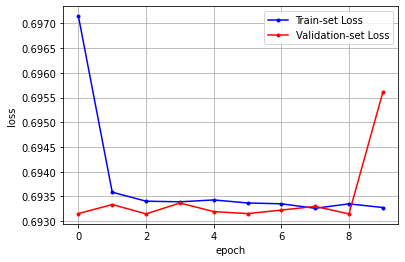

0:00:12


In [ ]:
start = time.time()
# 라이브러리
from keras.models import Sequential
from keras.layers import Dense, Dropout,Conv2D, MaxPooling2D, Activation
from keras.utils import to_categorical



# 다중퍼셉트론2 모델 구성
model = Sequential()
model.add(Dense(16, input_dim=65, kernel_initializer='normal',activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(32, activation='softmax'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='tanh'))
model.add(Dropout(0.25))
model.add(Dense(32, activation='linear'))
model.add(Dropout(0.25))
model.add(Dense(16, activation='linear'))
model.add(Dense(1, activation='sigmoid'))

# 모델 학습과정 설정
model.compile(optimizer='adam', loss="binary_crossentropy", metrics=['accuracy'])

##### 모델 학습(여기에 Train 파일 넣으세용) #####
history = model.fit(X3_train, rorl_train, epochs=10, batch_size=64, validation_data=(lg_x_test, lg_y_test))

# 모델 예측 (예측 Test 파일 넣으세용) - Accuracy 구하는 용도
#pred = model.predict(lg_x_test)
#print('정확도 :', metrics.accuracy_score(lg_y_test, pred))

##### 모델 평가(여기에 Test 파일 넣으세용) #####

print('\nAccuracy: {:.4f}'.format(model.evaluate(lg_x_test, lg_y_test)[1]))

y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")
plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()
print( clock(start) )

Epoch 1/10
520/520 [==============================] - 1s 2ms/step - loss: 0.6940 - accuracy: 0.4971
Epoch 2/10
520/520 [==============================] - 1s 2ms/step - loss: 0.6935 - accuracy: 0.5023
Epoch 3/10
520/520 [==============================] - 1s 2ms/step - loss: 0.6936 - accuracy: 0.4943
Epoch 4/10
520/520 [==============================] - 1s 2ms/step - loss: 0.6932 - accuracy: 0.5019
Epoch 5/10
520/520 [==============================] - 1s 2ms/step - loss: 0.6933 - accuracy: 0.5000
Epoch 6/10
520/520 [==============================] - 1s 2ms/step - loss: 0.6933 - accuracy: 0.5001
Epoch 7/10
520/520 [==============================] - 1s 2ms/step - loss: 0.6932 - accuracy: 0.4972
Epoch 8/10
520/520 [==============================] - 1s 2ms/step - loss: 0.6933 - accuracy: 0.4998
Epoch 9/10
520/520 [==============================] - 1s 2ms/step - loss: 0.6933 - accuracy: 0.4953
Epoch 10/10
520/520 [==============================] - 1s 2ms/step - loss: 0.6933 - accuracy: 0.4935

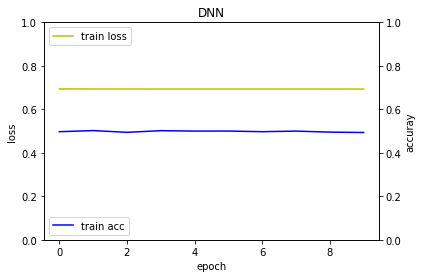

260/260 [==============================] - 0s 993us/step - loss: 0.6932 - accuracy: 0.4965
loss_and_metrics : [0.6932438015937805, 0.49650853872299194]
0:00:11


In [ ]:
start = time.time()
# 라이브러리
from keras.models import Sequential
from keras.layers import Dense, Dropout,Conv2D, MaxPooling2D, Activation
from keras.utils import to_categorical



# 다중퍼셉트론2 모델 구성
model = Sequential()
model.add(Dense(16, input_dim=65, kernel_initializer='normal',activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(32, activation='linear'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='softmax'))
model.add(Dropout(0.25))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(16, activation='linear'))
model.add(Dense(1, activation='sigmoid'))

# 모델 학습과정 설정
model.compile(optimizer='adam', loss="binary_crossentropy", metrics=['accuracy'])

##### 모델 학습(여기에 Train 파일 넣으세용) #####
hist = model.fit(X3_train, rorl_train, epochs=10, batch_size=64)

    
# 5. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots() # Figure와 axes.Axes, 두 개의 오브젝트를 리턴

acc_ax = loss_ax.twinx() # x축을 하나 더 만든다

loss_ax.set_ylim([0.0, 1.0])
acc_ax.set_ylim([0.0, 1.0])

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.title("DNN")
plt.show()

# 6. 모델 평가하기
loss_and_metrics = model.evaluate(lg_x_test, lg_y_test, batch_size=32)
print('loss_and_metrics : ' + str(loss_and_metrics))
print( clock(start) )

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics   

#분류->object 회귀
start = time.time()

# 부스팅 타입은 default값인 gbdt로, 학습률은 0.01로 지정 하였음
LGB = lgb.LGBMClassifier(objective="regression", boosting_type='gbdt', learning_rate = 0.01)

param_list = {"n_estimators": list(range(10, 300, 10)),
              "max_depth": list(range(4, 21, 4)),
              "max_features": list(range(3, 13, 2)),
              "min_samples_split": list(range(3, 13, 2))}

# 하이퍼파라미터 최적화
LGB_random_search = RandomizedSearchCV(estimator = LGB,
                                        param_distributions = param_list,
                                        n_iter = 10,      # 10번반복하는 lightgbm 구현 : 성능개선 시도
                                        cv = 3,           # cross-validation 3번 반복
                                        n_jobs = 10,
                                        random_state=42)

LGB_random_search.fit(X3_train, rorl_train)
y_pred = LGB_random_search.predict(lg_x_test)

#성능평가
print('정확도 :', metrics.accuracy_score(lg_y_test, y_pred))

print( LGB_random_search.best_params_ )
print( clock(start) )

정확도 : 0.48338550445461115
{'n_estimators': 30, 'min_samples_split': 5, 'max_features': 9, 'max_depth': 4}


RNN

In [ ]:
# 데이터 변환
# LTSM : 입력을 (샘플 수, 타입스텝, 특성 수)로 형태 변환
x_train = np.array(X3_train).reshape((X3_train.shape[0], X3_train.shape[1], 1))
y_train = np.array(rorl_train).reshape((rorl_train.shape[0], 1))
x_test = np.array(lg_x_test).reshape((lg_x_test.shape[0], lg_x_test.shape[1],1))
y_test = np.array(lg_y_test).reshape((lg_y_test.shape[0], 1))

Epoch 1/10
520/520 [==============================] - 39s 74ms/step - loss: 0.6949 - accuracy: 0.5009
Epoch 2/10
520/520 [==============================] - 40s 77ms/step - loss: 0.6939 - accuracy: 0.4988
Epoch 3/10
520/520 [==============================] - 40s 77ms/step - loss: 0.6936 - accuracy: 0.5000
Epoch 4/10
520/520 [==============================] - 40s 77ms/step - loss: 0.6935 - accuracy: 0.4988
Epoch 5/10
520/520 [==============================] - 40s 77ms/step - loss: 0.6935 - accuracy: 0.4998
Epoch 6/10
520/520 [==============================] - 40s 77ms/step - loss: 0.6935 - accuracy: 0.4997
Epoch 7/10
520/520 [==============================] - 40s 78ms/step - loss: 0.6935 - accuracy: 0.5000
Epoch 8/10
520/520 [==============================] - 40s 77ms/step - loss: 0.6934 - accuracy: 0.4978
Epoch 9/10
520/520 [==============================] - 40s 77ms/step - loss: 0.6933 - accuracy: 0.5067
Epoch 10/10
520/520 [==============================] - 43s 82ms/step - loss: 0.693

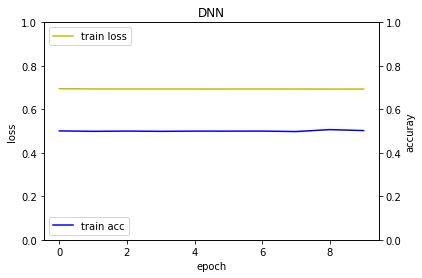

260/260 [==============================] - 5s 18ms/step - loss: 0.6933 - accuracy: 0.5022
loss_and_metrics : [0.6933420300483704, 0.5021671056747437]
0:06:51


In [ ]:
start = time.time()
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Activation, Dropout, LSTM

# RNN 모델 구성
model = Sequential()
model.add(SimpleRNN(65, input_shape = (65,1), return_sequences = True ,activation='tanh'))
model.add(Dropout(0.25))
model.add(Dense(130, activation='tanh'))
model.add(Dropout(0.5))
model.add(Dense(65, activation='relu'))
model.add(Dropout(0.25))
model.add(LSTM(32, return_sequences = True, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

# 모델 학습과정 설정
model.compile(optimizer='adam', loss="binary_crossentropy", metrics=['accuracy'])

##### 모델 학습(여기에 Train 파일 넣으세용) #####
hist = model.fit(x_train, y_train, epochs=10, batch_size=64 )

# 5. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots() # Figure와 axes.Axes, 두 개의 오브젝트를 리턴

acc_ax = loss_ax.twinx() # x축을 하나 더 만든다

loss_ax.set_ylim([0.0, 1.0])
acc_ax.set_ylim([0.0, 1.0])

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.title("DNN")
plt.show()

# 6. 모델 평가하기
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
print('loss_and_metrics : ' + str(loss_and_metrics))
print( clock(start) )

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_2 (SimpleRNN)     (None, 65, 65)            4355      
_________________________________________________________________
dropout_19 (Dropout)         (None, 65, 65)            0         
_________________________________________________________________
dense_26 (Dense)             (None, 65, 130)           8580      
_________________________________________________________________
dropout_20 (Dropout)         (None, 65, 130)           0         
_________________________________________________________________
dense_27 (Dense)             (None, 65, 65)            8515      
_________________________________________________________________
dropout_21 (Dropout)         (None, 65, 65)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 65, 32)           

# 데이터셋 ro,rl 심각도 1,2단계 없애기

In [ ]:
# 데이터 로드


# 정상데이터 (normal1,normal2)
start = time.time()
n = pd.read_excel("/content/drive/My Drive/1043-RP/FDD Data/1_Benchmark Tests/normal.xls",sheet_name="Complete Data Set")
n1 = pd.read_excel("/content/drive/My Drive/1043-RP/FDD Data/1_Benchmark Tests/normal1.xls",sheet_name="Complete Data Set")
n2 = pd.read_excel("/content/drive/My Drive/1043-RP/FDD Data/1_Benchmark Tests/normal2.xls",sheet_name="Complete Data Set")
print("normal", clock(start) )

# 고장데이터
# condenser fouling
start = time.time()
cf12 = pd.read_excel("/content/drive/My Drive/1043-RP/FDD Data/2_Condenser fouling/cf12.xls",sheet_name="Complete Data Set")
cf20 = pd.read_excel("/content/drive/My Drive/1043-RP/FDD Data/2_Condenser fouling/cf20.xls",sheet_name="Complete Data Set")
cf30 = pd.read_excel("/content/drive/My Drive/1043-RP/FDD Data/2_Condenser fouling/cf30.xls",sheet_name="Complete Data Set")
cf45 = pd.read_excel("/content/drive/My Drive/1043-RP/FDD Data/2_Condenser fouling/cf45.xls",sheet_name="Complete Data Set")
print("cf", clock(start) )

# Refrigerant overcharge
start = time.time()
#ro10 = pd.read_excel("/content/drive/My Drive/1043-RP/FDD Data/3_Refrigerant overcharge/ro10.xls",sheet_name="Complete Data Set")
#ro20 = pd.read_excel("/content/drive/My Drive/1043-RP/FDD Data/3_Refrigerant overcharge/ro20.xls",sheet_name="Complete Data Set")
ro30 = pd.read_excel("/content/drive/My Drive/1043-RP/FDD Data/3_Refrigerant overcharge/ro30.xls",sheet_name="Complete Data Set")
ro40 = pd.read_excel("/content/drive/My Drive/1043-RP/FDD Data/3_Refrigerant overcharge/ro40.xls",sheet_name="Complete Data Set")
print("ro",  clock(start) )

#Excess oil
start = time.time()
eo14 = pd.read_excel("/content/drive/My Drive/1043-RP/FDD Data/4_Excess oil/eo14.xls",sheet_name="Complete Data Set")
eo32 = pd.read_excel("/content/drive/My Drive/1043-RP/FDD Data/4_Excess oil/eo32.xls",sheet_name="Complete Data Set")
eo50 = pd.read_excel("/content/drive/My Drive/1043-RP/FDD Data/4_Excess oil/eo50.xls",sheet_name="Complete Data Set")
eo68 = pd.read_excel("/content/drive/My Drive/1043-RP/FDD Data/4_Excess oil/eo68--unsteady test1.xls",sheet_name="Complete Data Set")
print("eo", clock(start) )

# Reduced condenser water flow
start = time.time()
fwc10 = pd.read_excel("/content/drive/My Drive/1043-RP/FDD Data/5_Reduced condenser water flow/fwc10.xls",sheet_name="Complete Data Set")
fwc20 = pd.read_excel("/content/drive/My Drive/1043-RP/FDD Data/5_Reduced condenser water flow/fwc20.xls",sheet_name="Complete Data Set")
fwc30 = pd.read_excel("/content/drive/My Drive/1043-RP/FDD Data/5_Reduced condenser water flow/fwc30.xls",sheet_name="Complete Data Set")
fwc40 = pd.read_excel("/content/drive/My Drive/1043-RP/FDD Data/5_Reduced condenser water flow/fwc40.xls",sheet_name="Complete Data Set")
print("fwc",  clock(start) )

# Non condensables in refrigerant
start = time.time()
nc1 = pd.read_excel("/content/drive/My Drive/1043-RP/FDD Data/6_Non-condensables in refrigerant/nc1.xls",sheet_name="Complete Data Set")
nc2 = pd.read_excel("/content/drive/My Drive/1043-RP/FDD Data/6_Non-condensables in refrigerant/nc2.xls",sheet_name="Complete Data Set")
nc3 = pd.read_excel("/content/drive/My Drive/1043-RP/FDD Data/6_Non-condensables in refrigerant/nc3.xls",sheet_name="Complete Data Set")
nc5 = pd.read_excel("/content/drive/My Drive/1043-RP/FDD Data/6_Non-condensables in refrigerant/nc5.xls",sheet_name="Complete Data Set")
print("nc",  clock(start) )

# 7_reduced evaporator water flow
start = time.time()
fwe10 = pd.read_excel("/content/drive/My Drive/1043-RP/FDD Data/7_Reduced evaporator water flow/fwe10.xls",sheet_name="Complete Data Set")
fwe20 = pd.read_excel("/content/drive/My Drive/1043-RP/FDD Data/7_Reduced evaporator water flow/fwe20.xls",sheet_name="Complete Data Set")
fwe30 = pd.read_excel("/content/drive/My Drive/1043-RP/FDD Data/7_Reduced evaporator water flow/fwe30.xls",sheet_name="Complete Data Set")
fwe40 = pd.read_excel("/content/drive/My Drive/1043-RP/FDD Data/7_Reduced evaporator water flow/fwe40.xls",sheet_name="Complete Data Set")
print("fwe",  clock(start) )

# 8_refrigerant leak
start = time.time()
#rl10 = pd.read_excel("/content/drive/My Drive/1043-RP/FDD Data/8_Refrigerant leak/rl10.xls",sheet_name="Complete Data Set")
#rl20 = pd.read_excel("/content/drive/My Drive/1043-RP/FDD Data/8_Refrigerant leak/rl20.xls",sheet_name="Complete Data Set")
rl30 = pd.read_excel("/content/drive/My Drive/1043-RP/FDD Data/8_Refrigerant leak/rl30.xls",sheet_name="Complete Data Set")
rl40 = pd.read_excel("/content/drive/My Drive/1043-RP/FDD Data/8_Refrigerant leak/rl40.xls",sheet_name="Complete Data Set")

normal 0:00:07
cf 0:00:08
ro 0:00:04
eo 0:00:09
fwc 0:00:08
nc 0:00:08
fwe 0:00:08


In [ ]:
normal = pd.concat([n,n1,n2],axis=0)
cf = pd.concat([cf12,cf20,cf30,cf45],axis=0)
ro = pd.concat([ro30,ro40], axis=0)
eo= pd.concat([eo14,eo32,eo50,eo68], axis=0)
fwc= pd.concat([fwc10,fwc20,fwc30,fwc40], axis=0)
nc= pd.concat([nc1,nc2,nc3,nc5], axis=0)
fwe= pd.concat([fwe10,fwe20,fwe30,fwe40], axis=0)
rl= pd.concat([rl30,rl40], axis=0)

In [ ]:
normal['rorl'] = 0
normal['detect'] = 0
normal['target'] = 1

cf['rorl'] = 0
cf['detect'] = 1
cf['target'] = 2

ro['rorl'] = 3
ro['detect'] = 1
ro['target'] = 3

eo['rorl'] = 0
eo['detect'] = 1
eo['target'] = 4

fwc['rorl'] = 0
fwc['detect'] = 1
fwc['target'] = 5

nc['rorl'] = 0
nc['detect'] = 1
nc['target'] = 6

fwe['rorl'] = 0
fwe['detect'] = 1
fwe['target'] = 7

rl['rorl'] = 8
rl['detect'] = 1
rl['target'] = 3

In [ ]:
start = time.time()
# 라이브러리
from keras.models import Sequential
from keras.layers import Dense, Dropout,Conv2D, MaxPooling2D, Activation
from keras.utils import to_categorical



# 다중퍼셉트론2 모델 구성
model = Sequential()
model.add(Dense(16, input_dim=65, kernel_initializer='normal',activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(32, activation='tanh'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='tanh'))
model.add(Dropout(0.25))
model.add(Dense(32, activation='tanh'))
model.add(Dropout(0.25))
model.add(Dense(16, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

# 모델 학습과정 설정
model.compile(optimizer='adam', loss="binary_crossentropy", metrics=['accuracy'])

##### 모델 학습(여기에 Train 파일 넣으세용) #####
model.fit(X3_train, rorl_train, epochs=10, batch_size=64)

# 모델 예측 (예측 Test 파일 넣으세용) - Accuracy 구하는 용도
#pred = model.predict(lg_x_test)
#print('정확도 :', metrics.accuracy_score(lg_y_test, pred))

##### 모델 평가(여기에 Test 파일 넣으세용) #####
loss_and_metrics = model.evaluate(lg_x_test, lg_y_test, batch_size=32)
print('loss_and_metrics : ' + str(loss_and_metrics))
print( clock(start) )

Epoch 1/10
260/260 [==============================] - 1s 2ms/step - loss: 0.7096 - accuracy: 0.4965
Epoch 2/10
260/260 [==============================] - 0s 2ms/step - loss: 0.6973 - accuracy: 0.5104
Epoch 3/10
260/260 [==============================] - 1s 2ms/step - loss: 0.6111 - accuracy: 0.6358
Epoch 4/10
260/260 [==============================] - 1s 2ms/step - loss: 0.4872 - accuracy: 0.7920
Epoch 5/10
260/260 [==============================] - 1s 2ms/step - loss: 0.3861 - accuracy: 0.8482
Epoch 6/10
260/260 [==============================] - 1s 2ms/step - loss: 0.3901 - accuracy: 0.8417
Epoch 7/10
260/260 [==============================] - 1s 2ms/step - loss: 0.3818 - accuracy: 0.8461
Epoch 8/10
260/260 [==============================] - 1s 2ms/step - loss: 0.3500 - accuracy: 0.8608
Epoch 9/10
260/260 [==============================] - 1s 2ms/step - loss: 0.3575 - accuracy: 0.8576
Epoch 10/10
130/130 [==============================] - 0s 999us/step - loss: 0.1391 - accuracy: 0.98

Epoch 1/10
260/260 [==============================] - 1s 3ms/step - loss: 0.6977 - accuracy: 0.4913 - val_loss: 0.6938 - val_accuracy: 0.4878
Epoch 2/10
260/260 [==============================] - 1s 2ms/step - loss: 0.6923 - accuracy: 0.5113 - val_loss: 0.6971 - val_accuracy: 0.4878
Epoch 3/10
260/260 [==============================] - 1s 2ms/step - loss: 0.6855 - accuracy: 0.5250 - val_loss: 0.6292 - val_accuracy: 0.8083
Epoch 4/10
260/260 [==============================] - 1s 2ms/step - loss: 0.4289 - accuracy: 0.7787 - val_loss: 0.1710 - val_accuracy: 0.9376
Epoch 5/10
260/260 [==============================] - 1s 2ms/step - loss: 0.2749 - accuracy: 0.8470 - val_loss: 0.0390 - val_accuracy: 0.9841
Epoch 6/10
260/260 [==============================] - 1s 2ms/step - loss: 0.2365 - accuracy: 0.8623 - val_loss: 0.0319 - val_accuracy: 0.9892
Epoch 7/10
260/260 [==============================] - 1s 2ms/step - loss: 0.2268 - accuracy: 0.8629 - val_loss: 0.0241 - val_accuracy: 0.9911
Epoch 

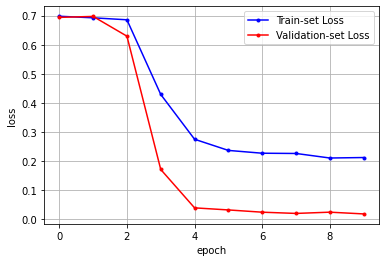

0:00:07


In [ ]:
start = time.time()
# 라이브러리
from keras.models import Sequential
from keras.layers import Dense, Dropout,Conv2D, MaxPooling2D, Activation
from keras.utils import to_categorical



# 다중퍼셉트론2 모델 구성
model = Sequential()
model.add(Dense(16, input_dim=65, kernel_initializer='normal',activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(32, activation='softmax'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='tanh'))
model.add(Dropout(0.25))
model.add(Dense(32, activation='linear'))
model.add(Dropout(0.25))
model.add(Dense(16, activation='linear'))
model.add(Dense(1, activation='sigmoid'))

# 모델 학습과정 설정
model.compile(optimizer='adam', loss="binary_crossentropy", metrics=['accuracy'])

##### 모델 학습(여기에 Train 파일 넣으세용) #####
history = model.fit(X3_train, rorl_train, epochs=10, batch_size=64, validation_data=(lg_x_test, lg_y_test))

# 모델 예측 (예측 Test 파일 넣으세용) - Accuracy 구하는 용도
#pred = model.predict(lg_x_test)
#print('정확도 :', metrics.accuracy_score(lg_y_test, pred))

##### 모델 평가(여기에 Test 파일 넣으세용) #####

print('\nAccuracy: {:.4f}'.format(model.evaluate(lg_x_test, lg_y_test)[1]))

y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")
plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()
print( clock(start) )

Epoch 1/10
260/260 [==============================] - 1s 2ms/step - loss: 0.7041 - accuracy: 0.5043
Epoch 2/10
260/260 [==============================] - 1s 2ms/step - loss: 0.6791 - accuracy: 0.5597
Epoch 3/10
260/260 [==============================] - 1s 2ms/step - loss: 0.5016 - accuracy: 0.7469
Epoch 4/10
260/260 [==============================] - 1s 2ms/step - loss: 0.3347 - accuracy: 0.8133
Epoch 5/10
260/260 [==============================] - 0s 2ms/step - loss: 0.2816 - accuracy: 0.8396
Epoch 6/10
260/260 [==============================] - 1s 2ms/step - loss: 0.2705 - accuracy: 0.8350
Epoch 7/10
260/260 [==============================] - 1s 2ms/step - loss: 0.2594 - accuracy: 0.8477
Epoch 8/10
260/260 [==============================] - 1s 2ms/step - loss: 0.2482 - accuracy: 0.8438
Epoch 9/10
260/260 [==============================] - 1s 2ms/step - loss: 0.2241 - accuracy: 0.8589
Epoch 10/10
260/260 [==============================] - 1s 2ms/step - loss: 0.2053 - accuracy: 0.8600

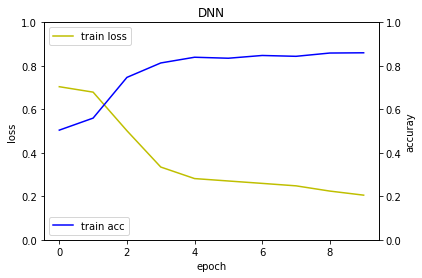

130/130 [==============================] - 0s 975us/step - loss: 0.1189 - accuracy: 0.9793
loss_and_metrics : [0.11891062557697296, 0.979292094707489]
0:00:06


In [ ]:
start = time.time()
# 라이브러리
from keras.models import Sequential
from keras.layers import Dense, Dropout,Conv2D, MaxPooling2D, Activation
from keras.utils import to_categorical



# 다중퍼셉트론2 모델 구성
model = Sequential()
model.add(Dense(16, input_dim=65, kernel_initializer='normal',activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(32, activation='tanh'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='tanh'))
model.add(Dropout(0.25))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(16, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

# 모델 학습과정 설정
model.compile(optimizer='adam', loss="binary_crossentropy", metrics=['accuracy'])

##### 모델 학습(여기에 Train 파일 넣으세용) #####
hist = model.fit(X3_train, rorl_train, epochs=10, batch_size=64)

    
# 5. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots() # Figure와 axes.Axes, 두 개의 오브젝트를 리턴

acc_ax = loss_ax.twinx() # x축을 하나 더 만든다

loss_ax.set_ylim([0.0, 1.0])
acc_ax.set_ylim([0.0, 1.0])

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.title("DNN")
plt.show()

# 6. 모델 평가하기
loss_and_metrics = model.evaluate(lg_x_test, lg_y_test, batch_size=32)
print('loss_and_metrics : ' + str(loss_and_metrics))
print( clock(start) )

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics   

#분류->object 회귀
start = time.time()

# 부스팅 타입은 default값인 gbdt로, 학습률은 0.01로 지정 하였음
LGB = lgb.LGBMClassifier(objective="regression", boosting_type='gbdt', learning_rate = 0.01)

param_list = {"n_estimators": list(range(10, 300, 10)),
              "max_depth": list(range(4, 21, 4)),
              "max_features": list(range(3, 13, 2)),
              "min_samples_split": list(range(3, 13, 2))}

# 하이퍼파라미터 최적화
LGB_random_search = RandomizedSearchCV(estimator = LGB,
                                        param_distributions = param_list,
                                        n_iter = 10,      # 10번반복하는 lightgbm 구현 : 성능개선 시도
                                        cv = 3,           # cross-validation 3번 반복
                                        n_jobs = 10,
                                        random_state=42)

LGB_random_search.fit(X3_train, rorl_train)
y_pred = LGB_random_search.predict(lg_x_test)

#성능평가
print('정확도 :', metrics.accuracy_score(lg_y_test, y_pred))

print( LGB_random_search.best_params_ )
print( clock(start) )

정확도 : 0.9963881531423068
{'n_estimators': 290, 'min_samples_split': 9, 'max_features': 7, 'max_depth': 8}
0:01:11


In [ ]:
# accuracy 확인
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(lg_y_test, y_pred))
print(classification_report(lg_y_test, y_pred))

[[2018    8]
 [   7 2120]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2026
           1       1.00      1.00      1.00      2127

    accuracy                           1.00      4153
   macro avg       1.00      1.00      1.00      4153
weighted avg       1.00      1.00      1.00      4153



RNN

In [ ]:
# 데이터 변환
# LTSM : 입력을 (샘플 수, 타입스텝, 특성 수)로 형태 변환
x_train = np.array(X3_train).reshape((X3_train.shape[0], X3_train.shape[1], 1))
y_train = np.array(rorl_train).reshape((rorl_train.shape[0], 1))
x_test = np.array(lg_x_test).reshape((lg_x_test.shape[0], lg_x_test.shape[1],1))
y_test = np.array(lg_y_test).reshape((lg_y_test.shape[0], 1))

Epoch 1/10
260/260 [==============================] - 31s 118ms/step - loss: 0.5056 - accuracy: 0.6811
Epoch 2/10
260/260 [==============================] - 31s 118ms/step - loss: 0.3101 - accuracy: 0.7991
Epoch 3/10
260/260 [==============================] - 30s 116ms/step - loss: 0.2967 - accuracy: 0.8090
Epoch 4/10
260/260 [==============================] - 30s 116ms/step - loss: 0.2832 - accuracy: 0.8183
Epoch 5/10
260/260 [==============================] - 30s 115ms/step - loss: 0.2835 - accuracy: 0.8205
Epoch 6/10
260/260 [==============================] - 35s 133ms/step - loss: 0.2741 - accuracy: 0.8255
Epoch 7/10
260/260 [==============================] - 31s 118ms/step - loss: 0.2751 - accuracy: 0.8273
Epoch 8/10
260/260 [==============================] - 30s 116ms/step - loss: 0.2719 - accuracy: 0.8293
Epoch 9/10
260/260 [==============================] - 30s 116ms/step - loss: 0.2671 - accuracy: 0.8322
Epoch 10/10
260/260 [==============================] - 30s 116ms/step - l

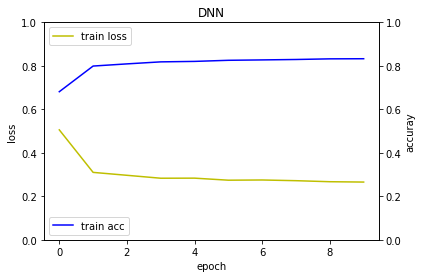

130/130 [==============================] - 3s 20ms/step - loss: 0.2530 - accuracy: 0.8373
loss_and_metrics : [0.2530091106891632, 0.8373374342918396]
0:05:15


In [ ]:
start = time.time()
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Activation, Dropout, LSTM

# RNN 모델 구성
model = Sequential()
model.add(SimpleRNN(65, input_shape = (65,1), return_sequences = True ,activation='tanh'))
model.add(Dropout(0.25))
model.add(SimpleRNN(130, return_sequences = True))
model.add(Dropout(0.5))
model.add(LSTM(65, return_sequences = True, activation='tanh'))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(1, activation='sigmoid'))

# 모델 학습과정 설정
model.compile(optimizer='adam', loss="binary_crossentropy", metrics=['accuracy'])

##### 모델 학습(여기에 Train 파일 넣으세용) #####
hist = model.fit(x_train, y_train, epochs=10, batch_size=64 )

# 5. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots() # Figure와 axes.Axes, 두 개의 오브젝트를 리턴

acc_ax = loss_ax.twinx() # x축을 하나 더 만든다

loss_ax.set_ylim([0.0, 1.0])
acc_ax.set_ylim([0.0, 1.0])

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.title("DNN")
plt.show()

# 6. 모델 평가하기
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
print('loss_and_metrics : ' + str(loss_and_metrics))
print( clock(start) )

In [ ]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_5 (SimpleRNN)     (None, 65, 65)            4355      
_________________________________________________________________
dropout_45 (Dropout)         (None, 65, 65)            0         
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, 65, 130)           25480     
_________________________________________________________________
dropout_46 (Dropout)         (None, 65, 130)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 65, 65)            50960     
_________________________________________________________________
dense_61 (Dense)             (None, 65, 32)            2112      
_________________________________________________________________
dropout_47 (Dropout)         (None, 65, 32)          

# 데이터셋 ro,rl 심각도 1단계만 없애기


In [ ]:
# 데이터 로드


# 정상데이터 (normal1,normal2)
start = time.time()
n = pd.read_excel("/content/drive/My Drive/1043-RP/FDD Data/1_Benchmark Tests/normal.xls",sheet_name="Complete Data Set")
n1 = pd.read_excel("/content/drive/My Drive/1043-RP/FDD Data/1_Benchmark Tests/normal1.xls",sheet_name="Complete Data Set")
n2 = pd.read_excel("/content/drive/My Drive/1043-RP/FDD Data/1_Benchmark Tests/normal2.xls",sheet_name="Complete Data Set")
print("normal", clock(start) )

# 고장데이터
# condenser fouling
start = time.time()
cf12 = pd.read_excel("/content/drive/My Drive/1043-RP/FDD Data/2_Condenser fouling/cf12.xls",sheet_name="Complete Data Set")
cf20 = pd.read_excel("/content/drive/My Drive/1043-RP/FDD Data/2_Condenser fouling/cf20.xls",sheet_name="Complete Data Set")
cf30 = pd.read_excel("/content/drive/My Drive/1043-RP/FDD Data/2_Condenser fouling/cf30.xls",sheet_name="Complete Data Set")
cf45 = pd.read_excel("/content/drive/My Drive/1043-RP/FDD Data/2_Condenser fouling/cf45.xls",sheet_name="Complete Data Set")
print("cf", clock(start) )

# Refrigerant overcharge
start = time.time()
#ro10 = pd.read_excel("/content/drive/My Drive/1043-RP/FDD Data/3_Refrigerant overcharge/ro10.xls",sheet_name="Complete Data Set")
ro20 = pd.read_excel("/content/drive/My Drive/1043-RP/FDD Data/3_Refrigerant overcharge/ro20.xls",sheet_name="Complete Data Set")
ro30 = pd.read_excel("/content/drive/My Drive/1043-RP/FDD Data/3_Refrigerant overcharge/ro30.xls",sheet_name="Complete Data Set")
ro40 = pd.read_excel("/content/drive/My Drive/1043-RP/FDD Data/3_Refrigerant overcharge/ro40.xls",sheet_name="Complete Data Set")
print("ro",  clock(start) )

#Excess oil
start = time.time()
eo14 = pd.read_excel("/content/drive/My Drive/1043-RP/FDD Data/4_Excess oil/eo14.xls",sheet_name="Complete Data Set")
eo32 = pd.read_excel("/content/drive/My Drive/1043-RP/FDD Data/4_Excess oil/eo32.xls",sheet_name="Complete Data Set")
eo50 = pd.read_excel("/content/drive/My Drive/1043-RP/FDD Data/4_Excess oil/eo50.xls",sheet_name="Complete Data Set")
eo68 = pd.read_excel("/content/drive/My Drive/1043-RP/FDD Data/4_Excess oil/eo68--unsteady test1.xls",sheet_name="Complete Data Set")
print("eo", clock(start) )

# Reduced condenser water flow
start = time.time()
fwc10 = pd.read_excel("/content/drive/My Drive/1043-RP/FDD Data/5_Reduced condenser water flow/fwc10.xls",sheet_name="Complete Data Set")
fwc20 = pd.read_excel("/content/drive/My Drive/1043-RP/FDD Data/5_Reduced condenser water flow/fwc20.xls",sheet_name="Complete Data Set")
fwc30 = pd.read_excel("/content/drive/My Drive/1043-RP/FDD Data/5_Reduced condenser water flow/fwc30.xls",sheet_name="Complete Data Set")
fwc40 = pd.read_excel("/content/drive/My Drive/1043-RP/FDD Data/5_Reduced condenser water flow/fwc40.xls",sheet_name="Complete Data Set")
print("fwc",  clock(start) )

# Non condensables in refrigerant
start = time.time()
nc1 = pd.read_excel("/content/drive/My Drive/1043-RP/FDD Data/6_Non-condensables in refrigerant/nc1.xls",sheet_name="Complete Data Set")
nc2 = pd.read_excel("/content/drive/My Drive/1043-RP/FDD Data/6_Non-condensables in refrigerant/nc2.xls",sheet_name="Complete Data Set")
nc3 = pd.read_excel("/content/drive/My Drive/1043-RP/FDD Data/6_Non-condensables in refrigerant/nc3.xls",sheet_name="Complete Data Set")
nc5 = pd.read_excel("/content/drive/My Drive/1043-RP/FDD Data/6_Non-condensables in refrigerant/nc5.xls",sheet_name="Complete Data Set")
print("nc",  clock(start) )

# 7_reduced evaporator water flow
start = time.time()
fwe10 = pd.read_excel("/content/drive/My Drive/1043-RP/FDD Data/7_Reduced evaporator water flow/fwe10.xls",sheet_name="Complete Data Set")
fwe20 = pd.read_excel("/content/drive/My Drive/1043-RP/FDD Data/7_Reduced evaporator water flow/fwe20.xls",sheet_name="Complete Data Set")
fwe30 = pd.read_excel("/content/drive/My Drive/1043-RP/FDD Data/7_Reduced evaporator water flow/fwe30.xls",sheet_name="Complete Data Set")
fwe40 = pd.read_excel("/content/drive/My Drive/1043-RP/FDD Data/7_Reduced evaporator water flow/fwe40.xls",sheet_name="Complete Data Set")
print("fwe",  clock(start) )

# 8_refrigerant leak
start = time.time()
#rl10 = pd.read_excel("/content/drive/My Drive/1043-RP/FDD Data/8_Refrigerant leak/rl10.xls",sheet_name="Complete Data Set")
rl20 = pd.read_excel("/content/drive/My Drive/1043-RP/FDD Data/8_Refrigerant leak/rl20.xls",sheet_name="Complete Data Set")
rl30 = pd.read_excel("/content/drive/My Drive/1043-RP/FDD Data/8_Refrigerant leak/rl30.xls",sheet_name="Complete Data Set")
rl40 = pd.read_excel("/content/drive/My Drive/1043-RP/FDD Data/8_Refrigerant leak/rl40.xls",sheet_name="Complete Data Set")
print("rl",  clock(start) )

normal 0:00:02
cf 0:00:03
ro 0:00:02
eo 0:00:03
fwc 0:00:03
nc 0:00:03
fwe 0:00:03
rl 0:00:02


In [ ]:
normal = pd.concat([n,n1,n2],axis=0)
cf = pd.concat([cf12,cf20,cf30,cf45],axis=0)
ro = pd.concat([ro20,ro30,ro40], axis=0)
eo= pd.concat([eo14,eo32,eo50,eo68], axis=0)
fwc= pd.concat([fwc10,fwc20,fwc30,fwc40], axis=0)
nc= pd.concat([nc1,nc2,nc3,nc5], axis=0)
fwe= pd.concat([fwe10,fwe20,fwe30,fwe40], axis=0)
rl= pd.concat([rl20,rl30,rl40], axis=0)

In [ ]:
normal['rorl'] = 0
normal['detect'] = 0
normal['target'] = 1

cf['rorl'] = 0
cf['detect'] = 1
cf['target'] = 2

ro['rorl'] = 3
ro['detect'] = 1
ro['target'] = 3

eo['rorl'] = 0
eo['detect'] = 1
eo['target'] = 4

fwc['rorl'] = 0
fwc['detect'] = 1
fwc['target'] = 5

nc['rorl'] = 0
nc['detect'] = 1
nc['target'] = 6

fwe['rorl'] = 0
fwe['detect'] = 1
fwe['target'] = 7

rl['rorl'] = 8
rl['detect'] = 1
rl['target'] = 3

In [ ]:
start = time.time()
# 라이브러리
from keras.models import Sequential
from keras.layers import Dense, Dropout,Conv2D, MaxPooling2D, Activation
from keras.utils import to_categorical



# 다중퍼셉트론2 모델 구성
model = Sequential()
model.add(Dense(16, input_dim=65, kernel_initializer='normal',activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(32, activation='tanh'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='tanh'))
model.add(Dropout(0.25))
model.add(Dense(32, activation='tanh'))
model.add(Dropout(0.25))
model.add(Dense(16, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

# 모델 학습과정 설정
model.compile(optimizer='adam', loss="binary_crossentropy", metrics=['accuracy'])

##### 모델 학습(여기에 Train 파일 넣으세용) #####
model.fit(X3_train, rorl_train, epochs=10, batch_size=64)

# 모델 예측 (예측 Test 파일 넣으세용) - Accuracy 구하는 용도
#pred = model.predict(lg_x_test)
#print('정확도 :', metrics.accuracy_score(lg_y_test, pred))

##### 모델 평가(여기에 Test 파일 넣으세용) #####
loss_and_metrics = model.evaluate(lg_x_test, lg_y_test, batch_size=32)
print('loss_and_metrics : ' + str(loss_and_metrics))
print( clock(start) )

Epoch 1/10
390/390 [==============================] - 1s 2ms/step - loss: 0.7094 - accuracy: 0.4998
Epoch 2/10
390/390 [==============================] - 1s 2ms/step - loss: 0.6983 - accuracy: 0.5001
Epoch 3/10
390/390 [==============================] - 1s 2ms/step - loss: 0.6973 - accuracy: 0.5019
Epoch 4/10
390/390 [==============================] - 1s 2ms/step - loss: 0.6909 - accuracy: 0.5294
Epoch 5/10
390/390 [==============================] - 1s 2ms/step - loss: 0.5967 - accuracy: 0.6780
Epoch 6/10
390/390 [==============================] - 1s 2ms/step - loss: 0.4968 - accuracy: 0.7736
Epoch 7/10
390/390 [==============================] - 1s 2ms/step - loss: 0.4360 - accuracy: 0.8135
Epoch 8/10
390/390 [==============================] - 1s 2ms/step - loss: 0.4159 - accuracy: 0.8269
Epoch 9/10
390/390 [==============================] - 1s 2ms/step - loss: 0.4121 - accuracy: 0.8264
Epoch 10/10
195/195 [==============================] - 0s 1ms/step - loss: 0.2622 - accuracy: 0.9335

Epoch 1/10
390/390 [==============================] - 1s 3ms/step - loss: 0.6979 - accuracy: 0.5031 - val_loss: 0.6931 - val_accuracy: 0.4999
Epoch 2/10
390/390 [==============================] - 1s 2ms/step - loss: 0.6939 - accuracy: 0.5058 - val_loss: 0.6937 - val_accuracy: 0.4999
Epoch 3/10
390/390 [==============================] - 1s 2ms/step - loss: 0.6573 - accuracy: 0.5735 - val_loss: 0.5764 - val_accuracy: 0.8552
Epoch 4/10
390/390 [==============================] - 1s 2ms/step - loss: 0.4993 - accuracy: 0.7643 - val_loss: 0.4211 - val_accuracy: 0.8550
Epoch 5/10
390/390 [==============================] - 1s 2ms/step - loss: 0.4061 - accuracy: 0.8137 - val_loss: 0.3619 - val_accuracy: 0.8318
Epoch 6/10
390/390 [==============================] - 1s 2ms/step - loss: 0.3574 - accuracy: 0.8373 - val_loss: 0.3708 - val_accuracy: 0.8441
Epoch 7/10
390/390 [==============================] - 1s 2ms/step - loss: 0.2954 - accuracy: 0.8804 - val_loss: 0.1674 - val_accuracy: 0.9557
Epoch 

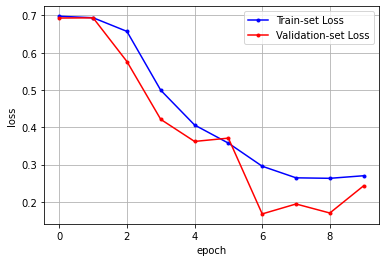

0:00:10


In [ ]:
start = time.time()
# 라이브러리
from keras.models import Sequential
from keras.layers import Dense, Dropout,Conv2D, MaxPooling2D, Activation
from keras.utils import to_categorical



# 다중퍼셉트론2 모델 구성
model = Sequential()
model.add(Dense(16, input_dim=65, kernel_initializer='normal',activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(32, activation='softmax'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='tanh'))
model.add(Dropout(0.25))
model.add(Dense(32, activation='linear'))
model.add(Dropout(0.25))
model.add(Dense(16, activation='linear'))
model.add(Dense(1, activation='sigmoid'))

# 모델 학습과정 설정
model.compile(optimizer='adam', loss="binary_crossentropy", metrics=['accuracy'])

##### 모델 학습(여기에 Train 파일 넣으세용) #####
history = model.fit(X3_train, rorl_train, epochs=10, batch_size=64, validation_data=(lg_x_test, lg_y_test))

# 모델 예측 (예측 Test 파일 넣으세용) - Accuracy 구하는 용도
#pred = model.predict(lg_x_test)
#print('정확도 :', metrics.accuracy_score(lg_y_test, pred))

##### 모델 평가(여기에 Test 파일 넣으세용) #####

print('\nAccuracy: {:.4f}'.format(model.evaluate(lg_x_test, lg_y_test)[1]))

y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")
plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()
print( clock(start) )

Epoch 1/10
390/390 [==============================] - 1s 2ms/step - loss: 0.7042 - accuracy: 0.5059
Epoch 2/10
390/390 [==============================] - 1s 2ms/step - loss: 0.6940 - accuracy: 0.5107
Epoch 3/10
390/390 [==============================] - 1s 2ms/step - loss: 0.6918 - accuracy: 0.5272
Epoch 4/10
390/390 [==============================] - 1s 2ms/step - loss: 0.5989 - accuracy: 0.6693
Epoch 5/10
390/390 [==============================] - 1s 2ms/step - loss: 0.4533 - accuracy: 0.7651
Epoch 6/10
390/390 [==============================] - 1s 2ms/step - loss: 0.3412 - accuracy: 0.8092
Epoch 7/10
390/390 [==============================] - 1s 2ms/step - loss: 0.3188 - accuracy: 0.8182
Epoch 8/10
390/390 [==============================] - 1s 2ms/step - loss: 0.2975 - accuracy: 0.8228
Epoch 9/10
390/390 [==============================] - 1s 2ms/step - loss: 0.2755 - accuracy: 0.8347
Epoch 10/10
390/390 [==============================] - 1s 2ms/step - loss: 0.2606 - accuracy: 0.8437

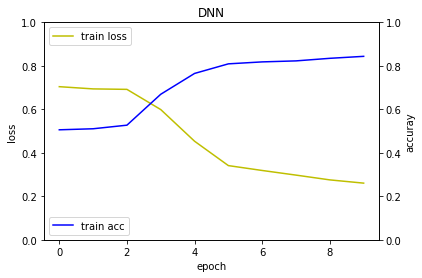

195/195 [==============================] - 0s 957us/step - loss: 0.0897 - accuracy: 0.9639
loss_and_metrics : [0.08967918157577515, 0.9638786315917969]
0:00:09


In [ ]:
start = time.time()
# 라이브러리
from keras.models import Sequential
from keras.layers import Dense, Dropout,Conv2D, MaxPooling2D, Activation
from keras.utils import to_categorical



# 다중퍼셉트론2 모델 구성
model = Sequential()
model.add(Dense(16, input_dim=65, kernel_initializer='normal',activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(32, activation='tanh'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='tanh'))
model.add(Dropout(0.25))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(16, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

# 모델 학습과정 설정
model.compile(optimizer='adam', loss="binary_crossentropy", metrics=['accuracy'])

##### 모델 학습(여기에 Train 파일 넣으세용) #####
hist = model.fit(X3_train, rorl_train, epochs=10, batch_size=64)

    
# 5. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots() # Figure와 axes.Axes, 두 개의 오브젝트를 리턴

acc_ax = loss_ax.twinx() # x축을 하나 더 만든다

loss_ax.set_ylim([0.0, 1.0])
acc_ax.set_ylim([0.0, 1.0])

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.title("DNN")
plt.show()

# 6. 모델 평가하기
loss_and_metrics = model.evaluate(lg_x_test, lg_y_test, batch_size=32)
print('loss_and_metrics : ' + str(loss_and_metrics))
print( clock(start) )

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics   

#분류->object 회귀
start = time.time()

# 부스팅 타입은 default값인 gbdt로, 학습률은 0.01로 지정 하였음
LGB = lgb.LGBMClassifier(objective="regression", boosting_type='gbdt', learning_rate = 0.01)

param_list = {"n_estimators": list(range(10, 300, 10)),
              "max_depth": list(range(4, 21, 4)),
              "max_features": list(range(3, 13, 2)),
              "min_samples_split": list(range(3, 13, 2))}

# 하이퍼파라미터 최적화
LGB_random_search = RandomizedSearchCV(estimator = LGB,
                                        param_distributions = param_list,
                                        n_iter = 10,      # 10번반복하는 lightgbm 구현 : 성능개선 시도
                                        cv = 3,           # cross-validation 3번 반복
                                        n_jobs = 10,
                                        random_state=42)

LGB_random_search.fit(X3_train, rorl_train)
y_pred = LGB_random_search.predict(lg_x_test)

#성능평가
print('정확도 :', metrics.accuracy_score(lg_y_test, y_pred))

print( LGB_random_search.best_params_ )
print( clock(start) )

정확도 : 0.9950232782148017
{'n_estimators': 290, 'min_samples_split': 9, 'max_features': 7, 'max_depth': 8}
0:01:29


In [ ]:
# accuracy 확인
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(lg_y_test, y_pred))
print(classification_report(lg_y_test, y_pred))

[[3096   19]
 [  12 3102]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      3115
           1       0.99      1.00      1.00      3114

    accuracy                           1.00      6229
   macro avg       1.00      1.00      1.00      6229
weighted avg       1.00      1.00      1.00      6229



RNN

In [ ]:
# 데이터 변환
# LTSM : 입력을 (샘플 수, 타입스텝, 특성 수)로 형태 변환
x_train = np.array(X3_train).reshape((X3_train.shape[0], X3_train.shape[1], 1))
y_train = np.array(rorl_train).reshape((rorl_train.shape[0], 1))
x_test = np.array(lg_x_test).reshape((lg_x_test.shape[0], lg_x_test.shape[1],1))
y_test = np.array(lg_y_test).reshape((lg_y_test.shape[0], 1))

In [ ]:
start = time.time()
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Activation, Dropout, LSTM

# RNN 모델 구성
model = Sequential()
model.add(LSTM(128, input_shape = (65,1), return_sequences = True ,activation='tanh'))
model.add(Dropout(0.1))
model.add(LSTM(256, return_sequences = True, activation='tanh'))
model.add(Dropout(0.1))
model.add(LSTM(512, input_shape = (65,1), return_sequences = True ,activation='tanh'))
model.add(Dropout(0.1))
model.add(LSTM(256, input_shape = (65,1), return_sequences = True ,activation='tanh'))
model.add(Dropout(0.1))
model.add(LSTM(128, return_sequences = True, activation='tanh'))
model.add(Dropout(0.1))
model.add(LSTM(64, return_sequences = True, activation='tanh'))
model.add(Dropout(0.1))
model.add(Dense(32, activation='tanh'))
model.add(Dropout(0.1))
model.add(Dense(16, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

# 모델 학습과정 설정
model.compile(optimizer='adam', loss="binary_crossentropy", metrics=['accuracy'])

##### 모델 학습(여기에 Train 파일 넣으세용) #####
hist = model.fit(x_train, y_train, epochs=100, batch_size=512 )

# 5. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots() # Figure와 axes.Axes, 두 개의 오브젝트를 리턴

acc_ax = loss_ax.twinx() # x축을 하나 더 만든다

loss_ax.set_ylim([0.0, 1.0])
acc_ax.set_ylim([0.0, 1.0])

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.title("DNN")
plt.show()

# 6. 모델 평가하기
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
print('loss_and_metrics : ' + str(loss_and_metrics))
print( clock(start) )

Epoch 1/100
49/49 [==============================] - 7s 136ms/step - loss: 0.6799 - accuracy: 0.5666
Epoch 2/100
49/49 [==============================] - 7s 138ms/step - loss: 0.5946 - accuracy: 0.6391
Epoch 3/100
49/49 [==============================] - 7s 138ms/step - loss: 0.4801 - accuracy: 0.7039
Epoch 4/100
49/49 [==============================] - 7s 138ms/step - loss: 0.4573 - accuracy: 0.7227
Epoch 5/100
49/49 [==============================] - 7s 138ms/step - loss: 0.4173 - accuracy: 0.7395
Epoch 6/100
49/49 [==============================] - 7s 138ms/step - loss: 0.3974 - accuracy: 0.7500
Epoch 7/100
49/49 [==============================] - 7s 138ms/step - loss: 0.3842 - accuracy: 0.7582
Epoch 8/100
49/49 [==============================] - 7s 139ms/step - loss: 0.3773 - accuracy: 0.7622
Epoch 9/100
49/49 [==============================] - 7s 138ms/step - loss: 0.3690 - accuracy: 0.7686
Epoch 10/100
49/49 [==============================] - 7s 139ms/step - loss: 0.3624 - accura

KeyboardInterrupt: ignored

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_20 (LSTM)               (None, 65, 128)           66560     
_________________________________________________________________
dropout_21 (Dropout)         (None, 65, 128)           0         
_________________________________________________________________
lstm_21 (LSTM)               (None, 65, 256)           394240    
_________________________________________________________________
dropout_22 (Dropout)         (None, 65, 256)           0         
_________________________________________________________________
lstm_22 (LSTM)               (None, 65, 512)           1574912   
_________________________________________________________________
dropout_23 (Dropout)         (None, 65, 512)           0         
_________________________________________________________________
lstm_23 (LSTM)               (None, 65, 256)          

# Train 데이터는 2,3,4단계만, Test 데이터는 1~4단계

In [ ]:
# 데이터 로드
# Refrigerant overcharge
start = time.time()
ro10 = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/FDD Data(1043-RP)/3_Refrigerant overcharge/ro10.xls",sheet_name="Complete Data Set")
ro20 = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/FDD Data(1043-RP)/3_Refrigerant overcharge/ro20.xls",sheet_name="Complete Data Set")
ro30 = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/FDD Data(1043-RP)/3_Refrigerant overcharge/ro30.xls",sheet_name="Complete Data Set")
ro40 = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/FDD Data(1043-RP)/3_Refrigerant overcharge/ro40.xls",sheet_name="Complete Data Set")
print("ro",  clock(start) )

# Refrigerant leak
start = time.time()
rl10 = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/FDD Data(1043-RP)/8_Refrigerant leak/rl10.xls",sheet_name="Complete Data Set")
rl20 = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/FDD Data(1043-RP)/8_Refrigerant leak/rl20.xls",sheet_name="Complete Data Set")
rl30 = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/FDD Data(1043-RP)/8_Refrigerant leak/rl30.xls",sheet_name="Complete Data Set")
rl40 = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/FDD Data(1043-RP)/8_Refrigerant leak/rl40.xls",sheet_name="Complete Data Set")
print("rl",  clock(start) )

# 심각도 수준 적기
ro10['severity'] = 1
ro20['severity'] = 2
ro30['severity'] = 3
ro40['severity'] = 4

rl10['severity'] = 1
rl20['severity'] = 2
rl30['severity'] = 3
rl40['severity'] = 4

#
ro = pd.concat([ro10,ro20,ro30,ro40], axis=0)
rl= pd.concat([rl10,rl20,rl30,rl40], axis=0)

#
ro['rorl'] = 0
rl['rorl'] = 1

ro 0:00:12
rl 0:00:11


In [ ]:
data1 = pd.concat([ro, rl], axis=0)
data1 = data1.drop(['Time'],axis=1)
data1

,TWE_set,TEI,TWEI,TEO,TWEO,TCI,TWCI,TCO,TWCO,TSI,TSO,TBI,TBO,Cond Tons,Cooling Tons,Shared Cond Tons,Cond Energy Balance,Evap Tons,Shared Evap Tons,Building Tons,Evap Energy Balance,kW,COP,kW/Ton,FWC,FWE,TEA,TCA,TRE,PRE,TRC,PRC,TRC_sub,T_suc,Tsh_suc,TR_dis,Tsh_dis,P_lift,Amps,RLA%,Heat Balance (kW),Heat Balance%,Tolerance%,Unit Status,Active Fault,TO_sump,TO_feed,PO_feed,PO_net,TWCD,TWED,VSS,VSL,VH,VM,VC,VE,VW,TWI,TWO,THI,THO,FWW,FWH,FWB,severity,rorl
0,50,70.67,70.6,71.76,71.7,71.73,71.5,72.59,72.5,72.24,73.22,70.89,71.37,1.383000e-46,5.720000e-47,1.590000e-46,2.400000e-46,1.407000e-46,-1.122000e-46,6.212000e-47,9.067000e-47,1.682000e-45,4.949000e-46,1.682000e-45,3.868000e-45,3.097000e-45,0.1,0.0,71.6,73.5,71.2,73.0,0.1,84.7,13.1,75.2,4.0,0.0,0,0,0.000,0.00,23.27,1,29,114.7,90.7,69.0,0.0,1.0,0.0,0.0,0.0,100,100.0,57.0,56,0.0,66.70,71.87,70.65,71.54,2.655000e-46,1.491000e-45,1.175000e-45,1,0
1,50,70.67,70.8,71.76,71.7,71.73,71.7,72.55,72.3,72.28,73.27,70.89,71.37,1.317000e-46,4.399000e-47,1.590000e-46,2.466000e-46,1.407000e-46,-1.122000e-46,6.212000e-47,9.067000e-47,1.682000e-45,4.949000e-46,1.682000e-45,3.868000e-45,3.097000e-45,0.1,0.0,71.6,73.5,71.2,73.0,0.1,84.7,13.1,75.2,3.8,0.0,0,0,0.000,0.00,23.27,1,29,114.5,90.8,69.0,0.0,0.6,0.0,0.0,0.0,100,100.0,57.0,56,30.0,66.70,71.87,70.65,71.58,2.042000e-46,1.491000e-45,1.175000e-45,1,0
2,50,70.67,70.9,71.76,71.8,71.73,72.0,72.59,72.0,72.28,73.27,70.89,71.37,8.520000e+00,3.118000e+00,9.796000e+00,1.520000e+01,6.133000e+00,-4.889000e+00,2.707000e+00,3.951000e+00,1.682000e-45,2.156000e+01,2.742000e-46,2.383000e+02,1.350000e+02,0.8,0.0,71.1,72.5,71.9,74.0,0.2,84.7,13.6,75.4,3.5,1.2,0,0,-8.392,-28.01,23.27,6,0,114.5,90.8,68.0,0.0,0.0,0.0,0.0,0.0,100,100.0,57.0,56,30.0,66.70,71.87,70.69,71.54,1.447000e+01,6.496000e+01,1.210000e+02,1,0
3,50,70.75,71.5,71.76,71.4,71.82,71.7,72.51,72.0,72.24,73.06,70.97,71.37,7.644000e+00,3.006000e+00,9.060000e+00,1.370000e+01,8.448000e+00,-6.594000e+00,3.345000e+00,5.198000e+00,1.682000e-45,2.970000e+01,1.991000e-46,2.643000e+02,2.010000e+02,0.0,0.0,71.4,73.3,71.6,73.5,0.0,84.8,13.4,75.4,3.6,0.4,0,0,2.824,10.51,23.27,6,0,113.8,90.8,68.0,0.0,0.2,0.1,0.0,0.0,100,100.0,57.0,56,30.0,66.70,71.83,71.59,71.41,1.406000e+01,8.028000e+01,1.060000e+02,1,0
4,50,70.88,71.5,71.68,71.5,71.86,71.8,72.43,71.8,72.20,72.73,71.02,71.41,6.385000e+00,2.593000e+00,5.991000e+00,9.783000e+00,7.115000e+00,-5.881000e+00,3.534000e+00,4.768000e+00,1.682000e-45,2.502000e+01,2.363000e-46,2.682000e+02,2.123000e+02,0.3,0.0,71.1,72.8,71.6,73.5,0.1,84.9,13.8,75.2,3.8,0.5,0,0,2.566,11.43,23.27,6,0,113.8,90.8,68.0,0.0,0.0,0.1,0.0,0.0,100,100.0,57.0,56,30.0,66.46,71.75,71.47,71.37,1.176000e+01,8.481000e+01,1.271000e+02,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5186,40,56.83,57.1,56.82,56.9,57.08,57.1,57.40,56.9,57.25,57.01,56.85,57.00,5.248000e-47,2.419000e-47,3.898000e-47,-1.070000e-47,1.890000e-48,4.042000e-48,1.984000e-47,2.199000e-47,1.682000e-45,6.646000e-48,1.682000e-45,3.868000e-45,3.097000e-45,0.1,0.4,56.8,53.5,57.3,54.1,0.0,74.7,17.8,97.3,39.8,0.1,0,0,0.000,0.00,23.27,6,0,106.3,106.5,49.7,0.0,0.0,0.3,0.0,0.0,100,100.0,56.0,56,0.0,55.98,56.60,57.18,57.20,5.806000e-46,4.762000e-46,3.771000e-45,4,1
5187,40,56.83,56.9,56.82,56.8,57.08,57.1,57.36,57.1,57.29,57.01,56.89,56.96,4.588000e-47,1.100000e-47,4.557000e-47,-1.070000e-47,1.890000e-48,9.327000e-48,9.272000e-48,1.671000e-47,1.682000e-45,6.646000e-48,1.682000e-45,3.868000e-45,3.097000e-45,0.1,0.2,56.8,53.5,57.3,54.1,0.0,74.6,17.8,97.3,40.1,0.1,0,0,0.000,0.00,23.27,6,0,106.3,106.7,49.2,0.0,0.2,0.0,0.0,0.0,100,100.0,56.0,56,0.0,55.98,56.60,57.18,57.25,2.641000e-46,2.225000e-46,3.644000e-45,4,1
5188,40,56.83,57.1,56.82,56.9,57.08,57.2,57.40,57.1,57.25,57.01,56.89,57.00,5.248000e-47,2.419000e-47,3.898000e-47,

In [ ]:
# 표준화
scaler = StandardScaler()
scaler.fit(data1.iloc[:,:-2])
X_scaled = scaler.transform(data1.iloc[:,:-2])
X_scaled = pd.DataFrame(X_scaled).reset_index(drop=True)

y_rorl_sev = pd.DataFrame(data1.iloc[:,-2:]).reset_index(drop=True)

X = pd.concat([X_scaled, y_rorl_sev], axis=1)

In [ ]:
X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,severity,rorl
0,1.335243,3.402779,3.327928,5.326046,5.215082,-0.420948,-0.422333,-1.051454,-1.046437,-0.900070,-0.004790,0.003597,3.510340,-2.629946,-2.297180,-0.005107,-0.004766,-2.441604,-0.007625,0.004657,-0.406357,-0.00491,-0.612948,-0.004908,-17.841893,-17.992307,-2.765152,-1.673922,7.784881,8.806172,-1.544866,-1.482462,-1.664642,6.882298,4.098866,-3.769125,-2.652622,-3.686021,-3.298069,-3.316266,-0.004908,-0.004907,5.784954,-11.203416,20.560203,0.077702,-5.840967,-6.262078,-7.730458,-2.123650,-2.428707,-1.899376,-0.377668,0.0,1.893398,1.953836,0.00694,-2.405616,4.134077,0.257199,2.079823,2.838880,-0.991336,-0.005054,0.002418,1,0
1,1.335243,3.402779,3.364809,5.326046,5.215082,-0.420948,-0.396225,-1.056382,-1.070751,-0.894954,-0.004789,0.003597,3.510340,-2.629946,-2.297180,-0.005107,-0.004766,-2.441604,-0.007625,0.004657,-0.406357,-0.00491,-0.612948,-0.004908,-17.841893,-17.992307,-2.765152,-1.673922,7.784881,8.806172,-1.544866,-1.482462,-1.664642,6.882298,4.098866,-3.769125,-2.669300,-3.686021,-3.298069,-3.316266,-0.004908,-0.004907,5.784954,-11.203416,20.560203,0.023122,-5.810746,-6.262078,-7.730458,-2.282125,-2.428707,-1.899376,-0.377668,0.0,1.893398,1.953836,0.00694,-0.651139,4.134077,0.257199,2.079823,2.845402,-0.991336,-0.005054,0.002418,1,0
2,1.335243,3.402779,3.383250,5.326046,5.235392,-0.420948,-0.357063,-1.051454,-1.107222,-0.894954,-0.004789,0.003597,3.510340,-2.308409,-1.950887,-0.005095,-0.004748,-2.180182,-0.007872,0.004794,0.626725,-0.00491,2.783456,-0.004908,-1.960805,-6.673784,-2.447019,-1.673922,7.662305,8.576831,-1.467809,-1.419856,-1.641132,6.882298,4.342110,-3.752682,-2.694316,-3.614197,-3.298069,-3.316266,-0.004908,-0.004909,5.784954,-8.223565,-0.136262,0.023122,-5.810746,-6.359710,-7.730458,-2.519838,-2.428707,-1.899376,-0.377668,0.0,1.893398,1.953836,0.00694,-0.651139,4.134077,0.257199,2.085309,2.838880,-0.751171,-0.004918,0.004511,1,0
3,1.335243,3.417711,3.493896,5.326046,5.154151,-0.408945,-0.396225,-1.061310,-1.107222,-0.900070,-0.004792,0.003633,3.510340,-2.341469,-1.963326,-0.005096,-0.004750,-2.081504,-0.007958,0.004826,0.952783,-0.00491,4.065771,-0.004908,-0.228081,-1.140284,-2.810600,-1.673922,7.735851,8.760304,-1.500834,-1.451159,-1.688153,6.899425,4.244813,-3.752682,-2.685977,-3.662080,-3.298069,-3.316266,-0.004908,-0.004907,5.784954,-8.223565,-0.136262,-0.167907,-5.810746,-6.359710,-7.730458,-2.440600,-2.391489,-1.899376,-0.377668,0.0,1.893398,1.953836,0.00694,-0.651139,4.134077,0.251245,2.208740,2.817681,-0.757975,-0.004885,0.004252,1,0
4,1.335243,3.441974,3.493896,5.309470,5.174461,-0.403610,-0.383171,-1.071167,-1.131536,-0.905187,-0.004796,0.003655,3.517826,-2.388982,-2.009195,-0.005100,-0.004755,-2.138324,-0.007922,0.004835,0.840349,-0.00491,3.328519,-0.004908,0.031828,-0.192882,-2.674257,-1.673922,7.662305,8.645634,-1.500834,-1.451159,-1.664642,6.916553,4.439408,-3.769125,-2.669300,-3.656095,-3.298069,-3.316266,-0.004908,-0.004907,5.784954,-8.223565,-0.136262,-0.167907,-5.810746,-6.359710,-7.730458,-2.519838,-2.391489,-1.899376,-0.377668,0.0,1.893398,1.953836,0.00694,-0.651139,4.016591,0.239336,2.192282,2.811159,-0.796150,-0.004876,0.004617,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41523,-1.074138,0.819658,0.838407,2.230424,2.209143,-2.374790,-2.302082,-2.922942,-2.942924,-2.817463,-0.005007,-0.002744,0.821058,-2.629946,-2.297180,-0.005107,-0.004766,-2.441604,-0.007625,0.004657,-0.406357,-0.00491,-0.612948,-0.004908,-17.841893,-17.992307,-2.765152,-1.512094,4.156631,4.219358,-3.074998,-2.665702,-1.688153,5.169589,6.385363,-1.952184,0.332614,-3.680036,-3.298069,-3.316266,-

In [ ]:
X2 = X.iloc[:,:-1]
y_rorl = X.iloc[:,-2:]
y_sev = data1.iloc[:,-2]


# train, test 분리
#rorl
X3_train, X3_test, rorl_train, rorl_test = ms.train_test_split(X2, y_rorl, 
                                                      test_size = 0.25, random_state = 100, stratify = y_sev )

In [ ]:
# train 셋 (2,3,4만)
X3_train = X3_train.loc[X3_train["severity"] != 1].iloc[:,:-1]
rorl_train = rorl_train.loc[rorl_train["severity"] != 1].iloc[:,-1]

X3_test = X3_test.iloc[:,:-1]
rorl_test = rorl_test.iloc[:,-1]

모델이당

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics   

#분류->object 회귀
start = time.time()

# 부스팅 타입은 default값인 gbdt로, 학습률은 0.01로 지정 하였음
LGB = lgb.LGBMClassifier(objective="regression", boosting_type='gbdt') #learning_rate = 0.01

param_list = {"n_estimators": list(range(10, 300, 10)),
              "max_depth": list(range(4, 21, 4)),
              "max_features": list(range(3, 13, 2)),
              "min_samples_split": list(range(3, 13, 2)),
              "learning_rate": [0.0001,0.001,0.01,0.1,1]}

# 하이퍼파라미터 최적화
LGB_random_search = RandomizedSearchCV(estimator = LGB,
                                        param_distributions = param_list,
                                        n_iter = 10,      # 10번반복하는 lightgbm 구현 : 성능개선 시도
                                        cv = 3,           # cross-validation 3번 반복
                                        n_jobs = -1,
                                        random_state=42)

LGB_random_search.fit(X3_train, rorl_train)
y_pred = LGB_random_search.predict(X3_test)

#성능평가
print('정확도 :', metrics.accuracy_score(rorl_test, y_pred))
print(confusion_matrix(rorl_test, y_pred))
print(classification_report(rorl_test, y_pred))

print( LGB_random_search.best_params_ )
print( clock(start) )

정확도 : 0.9339240994028125
[[5006  169]
 [ 517 4690]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      5175
           1       0.97      0.90      0.93      5207

    accuracy                           0.93     10382
   macro avg       0.94      0.93      0.93     10382
weighted avg       0.94      0.93      0.93     10382

{'n_estimators': 170, 'min_samples_split': 7, 'max_features': 7, 'max_depth': 8, 'learning_rate': 0.1}
0:00:43


DNN 이당

In [ ]:
# 원핫 인코딩 (One_Hot)
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(rorl_train)
one_hot_test_labels = to_categorical(rorl_test)



*   https://keras.io/ko/visualization/
*   https://tykimos.github.io/2019/05/10/KerasTuner/


*   Learning rate: https://jjeongil.tistory.com/823
*   https://keras.io/ko/optimizers/#adam
*   https://keras.io/api/optimizers/







Epoch 1/500
365/365 [==============================] - 1s 3ms/step - loss: 0.1411 - accuracy: 0.9505
Epoch 2/500
365/365 [==============================] - 1s 3ms/step - loss: 0.0651 - accuracy: 0.9812
Epoch 3/500
365/365 [==============================] - 1s 3ms/step - loss: 0.0568 - accuracy: 0.9819
Epoch 4/500
365/365 [==============================] - 1s 3ms/step - loss: 0.0513 - accuracy: 0.9827
Epoch 5/500
365/365 [==============================] - 1s 3ms/step - loss: 0.0507 - accuracy: 0.9827
Epoch 6/500
365/365 [==============================] - 1s 3ms/step - loss: 0.0507 - accuracy: 0.9816
Epoch 7/500
365/365 [==============================] - 1s 3ms/step - loss: 0.0465 - accuracy: 0.9823
Epoch 8/500
365/365 [==============================] - 1s 3ms/step - loss: 0.0468 - accuracy: 0.9828
Epoch 9/500
365/365 [==============================] - 1s 3ms/step - loss: 0.0452 - accuracy: 0.9829
Epoch 10/500
365/365 [==============================] - 1s 3ms/step - loss: 0.0444 - accura

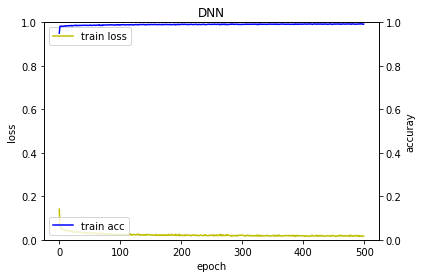

163/163 [==============================] - 0s 2ms/step - loss: 0.2793 - accuracy: 0.9360
loss_and_metrics : [0.27927184104919434, 0.9360431432723999]
0:09:53


In [ ]:
start = time.time()
# 라이브러리
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout,Conv2D, MaxPooling2D, Activation
from keras.utils import to_categorical



# 다중퍼셉트론2 모델 구성
model = Sequential()
model.add(Dense(16, input_dim=65, kernel_initializer='RandomUniform',activation='tanh')) # uniform 93, RandomUniform 94, lecun_uniform 93, RandomNormal 93
model.add(Dropout(0.25))
model.add(Dense(32, activation='tanh'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='tanh'))
model.add(Dropout(0.25))
model.add(Dense(32, activation='tanh'))   # relu
model.add(Dropout(0.25))
model.add(Dense(16, activation='tanh'))
model.add(Dense(2, activation='sigmoid')) # sigmoid

# 모델 학습과정 설정
# model.compile(optimizer='adam', loss="binary_crossentropy", metrics=['accuracy'])
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer= opt, loss="binary_crossentropy", metrics=['accuracy'])   # Learning rate 추가 

##### 모델 학습(여기에 Train 파일 넣으세용) #####
hist = model.fit(X3_train, one_hot_train_labels, epochs=500, batch_size=64)

    
# 5. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots() # Figure와 axes.Axes, 두 개의 오브젝트를 리턴

acc_ax = loss_ax.twinx() # x축을 하나 더 만든다

loss_ax.set_ylim([0.0, 1.0])
acc_ax.set_ylim([0.0, 1.0])

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.title("DNN")
plt.show()

# 6. 모델 평가하기
loss_and_metrics = model.evaluate(X3_test, one_hot_test_labels, batch_size=64)
print('loss_and_metrics : ' + str(loss_and_metrics))
print( clock(start) )

Epoch 1/20
365/365 [==============================] - 1s 3ms/step - loss: 0.1783 - accuracy: 0.9277
Epoch 2/20
365/365 [==============================] - 1s 3ms/step - loss: 0.0778 - accuracy: 0.9762
Epoch 3/20
365/365 [==============================] - 1s 3ms/step - loss: 0.0615 - accuracy: 0.9798
Epoch 4/20
365/365 [==============================] - 1s 3ms/step - loss: 0.0579 - accuracy: 0.9794
Epoch 5/20
365/365 [==============================] - 1s 3ms/step - loss: 0.0561 - accuracy: 0.9803
Epoch 6/20
365/365 [==============================] - 1s 3ms/step - loss: 0.0534 - accuracy: 0.9813
Epoch 7/20
365/365 [==============================] - 1s 3ms/step - loss: 0.0451 - accuracy: 0.9844
Epoch 8/20
365/365 [==============================] - 1s 3ms/step - loss: 0.0432 - accuracy: 0.9838
Epoch 9/20
365/365 [==============================] - 1s 3ms/step - loss: 0.0435 - accuracy: 0.9834
Epoch 10/20
365/365 [==============================] - 1s 3ms/step - loss: 0.0393 - accuracy: 0.9856

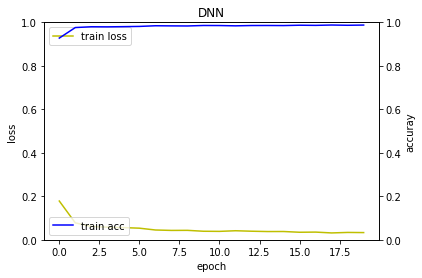

163/163 [==============================] - 0s 2ms/step - loss: 0.4104 - accuracy: 0.9190
loss_and_metrics : [0.4104137122631073, 0.9189944267272949]
0:00:21


In [ ]:
# 만들어봥

start = time.time()
# 라이브러리
from keras.models import Sequential
from keras.layers import Dense, Dropout,Conv2D, MaxPooling2D, Activation
from keras.utils import to_categorical



# 다중퍼셉트론2 모델 구성
model = Sequential()
model.add(Dense(16, input_dim=65, kernel_initializer='normal',activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(32, activation='tanh'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='tanh'))
model.add(Dropout(0.25))
model.add(Dense(128, activation='tanh'))
model.add(Dropout(0.25))
model.add(Dense(64, activation='tanh'))
model.add(Dropout(0.25))
model.add(Dense(32, activation='tanh'))
model.add(Dropout(0.25))
model.add(Dense(16, activation='tanh'))
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid'))

# 모델 학습과정 설정
model.compile(optimizer='adam', loss="binary_crossentropy", metrics=['accuracy'])

##### 모델 학습(여기에 Train 파일 넣으세용) #####
hist = model.fit(X3_train, rorl_train, epochs=20, batch_size=64)

    
# 5. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots() # Figure와 axes.Axes, 두 개의 오브젝트를 리턴

acc_ax = loss_ax.twinx() # x축을 하나 더 만든다

loss_ax.set_ylim([0.0, 1.0])
acc_ax.set_ylim([0.0, 1.0])

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.title("DNN")
plt.show()

# 6. 모델 평가하기
loss_and_metrics = model.evaluate(X3_test, rorl_test, batch_size=64)
print('loss_and_metrics : ' + str(loss_and_metrics))
print( clock(start) )

In [ ]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_55 (Dense)             (None, 16)                1056      
_________________________________________________________________
dropout_67 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_56 (Dense)             (None, 32)                544       
_________________________________________________________________
dropout_68 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_57 (Dense)             (None, 64)                2112      
_________________________________________________________________
dropout_69 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_58 (Dense)             (None, 128)             

## 이 모델들은 그냥 ㅎㅎ :)


*   LSTM
*   RNN



LSTM 이당

In [ ]:
# 데이터 변환
# LTSM : 입력을 (샘플 수, 타입스텝, 특성 수)로 형태 변환
x_train = np.array(X3_train).reshape((X3_train.shape[0], X3_train.shape[1], 1))
y_train = np.array(rorl_train).reshape((rorl_train.shape[0], 1))
x_test = np.array(X3_test).reshape((X3_test.shape[0], X3_test.shape[1],1))
y_test = np.array(rorl_test).reshape((rorl_test.shape[0], 1))

In [ ]:
x_train.shape

(23360, 65, 1)

In [ ]:
x_test.shape

(10382, 65, 1)

Epoch 1/30
46/46 [==============================] - 9s 192ms/step - loss: 0.6811 - accuracy: 0.5661
Epoch 2/30
46/46 [==============================] - 9s 192ms/step - loss: 0.6271 - accuracy: 0.6074
Epoch 3/30
46/46 [==============================] - 9s 192ms/step - loss: 0.5390 - accuracy: 0.6661
Epoch 4/30
46/46 [==============================] - 9s 193ms/step - loss: 0.5159 - accuracy: 0.6851
Epoch 5/30
46/46 [==============================] - 9s 192ms/step - loss: 0.4646 - accuracy: 0.7147
Epoch 6/30
46/46 [==============================] - 9s 192ms/step - loss: 0.4560 - accuracy: 0.7183
Epoch 7/30
46/46 [==============================] - 9s 191ms/step - loss: 0.4280 - accuracy: 0.7322
Epoch 8/30
46/46 [==============================] - 9s 193ms/step - loss: 0.4188 - accuracy: 0.7377
Epoch 9/30
46/46 [==============================] - 9s 191ms/step - loss: 0.4112 - accuracy: 0.7408
Epoch 10/30
46/46 [==============================] - 9s 192ms/step - loss: 0.4049 - accuracy: 0.7448

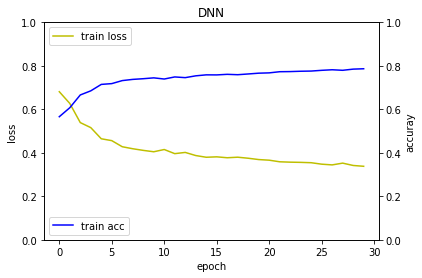

325/325 [==============================] - 15s 45ms/step - loss: 0.4060 - accuracy: 0.7676
loss_and_metrics : [0.40600791573524475, 0.7676156759262085]
0:04:55


In [ ]:
start = time.time()
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Activation, Dropout, LSTM

# RNN 모델 구성
model = Sequential()
model.add(LSTM(32, input_shape = (65,1), return_sequences = True ,activation='tanh'))
model.add(Dropout(0.25))
model.add(LSTM(64, return_sequences = True, activation='tanh'))
model.add(Dropout(0.25))
model.add(LSTM(128, return_sequences = True, activation='tanh'))
model.add(Dropout(0.25))
model.add(LSTM(256, return_sequences = True ,activation='tanh'))
model.add(Dropout(0.25))
model.add(LSTM(128, return_sequences = True, activation='tanh'))
model.add(Dropout(0.25))
model.add(LSTM(64, return_sequences = True, activation='tanh'))
model.add(Dropout(0.25))
model.add(Dense(32, activation='tanh'))
model.add(Dropout(0.25))
model.add(Dense(16, activation='tanh'))
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid'))

# 모델 학습과정 설정
opt = keras.optimizers.Adam(learning_rate=0.001)  # learning rate는 0.001
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=['accuracy'])

##### 모델 학습(여기에 Train 파일 넣으세용) #####
hist = model.fit(x_train, y_train, epochs=30, batch_size=512 )

# 5. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots() # Figure와 axes.Axes, 두 개의 오브젝트를 리턴

acc_ax = loss_ax.twinx() # x축을 하나 더 만든다

loss_ax.set_ylim([0.0, 1.0])
acc_ax.set_ylim([0.0, 1.0])

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.title("DNN")
plt.show()

# 6. 모델 평가하기
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
print('loss_and_metrics : ' + str(loss_and_metrics))
print( clock(start) )

RNN 이당

In [ ]:
# 데이터 변환
# LTSM : 입력을 (샘플 수, 타입스텝, 특성 수)로 형태 변환
x_train = np.array(X3_train).reshape((X3_train.shape[0], X3_train.shape[1], 1))
y_train = np.array(rorl_train).reshape((rorl_train.shape[0], 1))
x_test = np.array(X3_test).reshape((X3_test.shape[0], X3_test.shape[1],1))
y_test = np.array(rorl_test).reshape((rorl_test.shape[0], 1))

Epoch 1/10
46/46 [==============================] - 9s 191ms/step - loss: 0.7134 - accuracy: 0.5553
Epoch 2/10
46/46 [==============================] - 9s 203ms/step - loss: 0.5437 - accuracy: 0.6963
Epoch 3/10
46/46 [==============================] - 9s 193ms/step - loss: 0.4435 - accuracy: 0.7562
Epoch 4/10
46/46 [==============================] - 10s 213ms/step - loss: 0.4062 - accuracy: 0.7743
Epoch 5/10
46/46 [==============================] - 9s 206ms/step - loss: 0.3860 - accuracy: 0.7848
Epoch 6/10
46/46 [==============================] - 9s 206ms/step - loss: 0.3700 - accuracy: 0.7935
Epoch 7/10
46/46 [==============================] - 9s 203ms/step - loss: 0.3534 - accuracy: 0.8024
Epoch 8/10
46/46 [==============================] - 9s 203ms/step - loss: 0.3425 - accuracy: 0.8083
Epoch 9/10
46/46 [==============================] - 10s 207ms/step - loss: 0.3316 - accuracy: 0.8160
Epoch 10/10
46/46 [==============================] - 9s 206ms/step - loss: 0.3287 - accuracy: 0.81

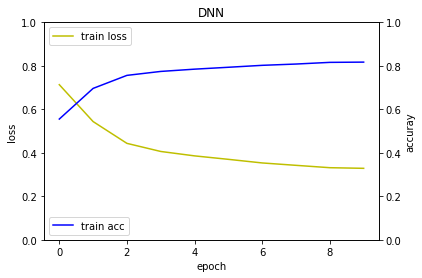

325/325 [==============================] - 9s 26ms/step - loss: 0.3644 - accuracy: 0.8130
loss_and_metrics : [0.364397794008255, 0.8130229115486145]
0:01:48


In [ ]:
start = time.time()
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Activation, Dropout, LSTM

# RNN 모델 구성
model = Sequential()
model.add(SimpleRNN(32,input_shape = (65,1), return_sequences = True, activation='tanh'))
model.add(Dropout(0.25))
model.add(Dense(64, activation='tanh'))
model.add(Dropout(0.25))
model.add(SimpleRNN(128, return_sequences = True ,activation='tanh'))
model.add(Dropout(0.25))
model.add(SimpleRNN(256, return_sequences = True, activation='tanh'))
model.add(Dropout(0.25))
model.add(SimpleRNN(128, return_sequences = True, activation='tanh'))
model.add(Dropout(0.25))
model.add(SimpleRNN(64, return_sequences = True, activation='tanh'))
model.add(Dropout(0.25))
model.add(Dense(32, activation='tanh'))
model.add(Dropout(0.25))
model.add(Dense(16, activation='tanh'))
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid'))

# 모델 학습과정 설정
model.compile(optimizer='adam', loss="binary_crossentropy", metrics=['accuracy'])

##### 모델 학습(여기에 Train 파일 넣으세용) #####
hist = model.fit(x_train, y_train, epochs=10, batch_size=512 )

# 5. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots() # Figure와 axes.Axes, 두 개의 오브젝트를 리턴

acc_ax = loss_ax.twinx() # x축을 하나 더 만든다

loss_ax.set_ylim([0.0, 1.0])
acc_ax.set_ylim([0.0, 1.0])

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.title("DNN")
plt.show()

# 6. 모델 평가하기
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
print('loss_and_metrics : ' + str(loss_and_metrics))
print( clock(start) )

# 3단계로 나누어

In [ ]:
# 데이터 로드
# Refrigerant overcharge
start = time.time()
ro10 = pd.read_excel("/content/drive/My Drive/1043-RP/FDD Data/3_Refrigerant overcharge/ro10.xls",sheet_name="Complete Data Set")
ro20 = pd.read_excel("/content/drive/My Drive/1043-RP/FDD Data/3_Refrigerant overcharge/ro20.xls",sheet_name="Complete Data Set")
ro30 = pd.read_excel("/content/drive/My Drive/1043-RP/FDD Data/3_Refrigerant overcharge/ro30.xls",sheet_name="Complete Data Set")
ro40 = pd.read_excel("/content/drive/My Drive/1043-RP/FDD Data/3_Refrigerant overcharge/ro40.xls",sheet_name="Complete Data Set")
print("ro",  clock(start) )

# Refrigerant leak
start = time.time()
rl10 = pd.read_excel("/content/drive/My Drive/1043-RP/FDD Data/8_Refrigerant leak/rl10.xls",sheet_name="Complete Data Set")
rl20 = pd.read_excel("/content/drive/My Drive/1043-RP/FDD Data/8_Refrigerant leak/rl20.xls",sheet_name="Complete Data Set")
rl30 = pd.read_excel("/content/drive/My Drive/1043-RP/FDD Data/8_Refrigerant leak/rl30.xls",sheet_name="Complete Data Set")
rl40 = pd.read_excel("/content/drive/My Drive/1043-RP/FDD Data/8_Refrigerant leak/rl40.xls",sheet_name="Complete Data Set")
print("rl",  clock(start) )

# 심각도 수준 적기
ro10['severity'] = 1
ro20['severity'] = 2
ro30['severity'] = 3
ro40['severity'] = 4

rl10['severity'] = 1
rl20['severity'] = 2
rl30['severity'] = 3
rl40['severity'] = 4

#
ro = pd.concat([ro20,ro30,ro40], axis=0)
rl= pd.concat([rl20,rl30,rl40], axis=0)

# 1은 ro, 2는 rl
ro['rorl'] = 1  
rl['rorl'] = 2  

# 0은 심각도 1단계들만 묶어서
ro10['rorl'] = 0  
rl10['rorl'] = 0 

#
ro = pd.concat([ro10,ro], axis=0)
rl= pd.concat([rl10,rl], axis=0)

ro 0:00:03
rl 0:00:03


In [ ]:
data1 = pd.concat([ro, rl], axis=0)
data1 = data1.drop(['Time'],axis=1)
data1

,TWE_set,TEI,TWEI,TEO,TWEO,TCI,TWCI,TCO,TWCO,TSI,TSO,TBI,TBO,Cond Tons,Cooling Tons,Shared Cond Tons,Cond Energy Balance,Evap Tons,Shared Evap Tons,Building Tons,Evap Energy Balance,kW,COP,kW/Ton,FWC,FWE,TEA,TCA,TRE,PRE,TRC,PRC,TRC_sub,T_suc,Tsh_suc,TR_dis,Tsh_dis,P_lift,Amps,RLA%,Heat Balance (kW),Heat Balance%,Tolerance%,Unit Status,Active Fault,TO_sump,TO_feed,PO_feed,PO_net,TWCD,TWED,VSS,VSL,VH,VM,VC,VE,VW,TWI,TWO,THI,THO,FWW,FWH,FWB,severity,rorl
0,50,70.67,70.6,71.76,71.7,71.73,71.5,72.59,72.5,72.24,73.22,70.89,71.37,1.383000e-46,5.720000e-47,1.590000e-46,2.400000e-46,1.407000e-46,-1.122000e-46,6.212000e-47,9.067000e-47,1.682000e-45,4.949000e-46,1.682000e-45,3.868000e-45,3.097000e-45,0.1,0.0,71.6,73.5,71.2,73.0,0.1,84.7,13.1,75.2,4.0,0.0,0,0,0.000,0.00,23.27,1,29,114.7,90.7,69.0,0.0,1.0,0.0,0.0,0.0,100,100.0,57.0,56,0.0,66.70,71.87,70.65,71.54,2.655000e-46,1.491000e-45,1.175000e-45,1,0
1,50,70.67,70.8,71.76,71.7,71.73,71.7,72.55,72.3,72.28,73.27,70.89,71.37,1.317000e-46,4.399000e-47,1.590000e-46,2.466000e-46,1.407000e-46,-1.122000e-46,6.212000e-47,9.067000e-47,1.682000e-45,4.949000e-46,1.682000e-45,3.868000e-45,3.097000e-45,0.1,0.0,71.6,73.5,71.2,73.0,0.1,84.7,13.1,75.2,3.8,0.0,0,0,0.000,0.00,23.27,1,29,114.5,90.8,69.0,0.0,0.6,0.0,0.0,0.0,100,100.0,57.0,56,30.0,66.70,71.87,70.65,71.58,2.042000e-46,1.491000e-45,1.175000e-45,1,0
2,50,70.67,70.9,71.76,71.8,71.73,72.0,72.59,72.0,72.28,73.27,70.89,71.37,8.520000e+00,3.118000e+00,9.796000e+00,1.520000e+01,6.133000e+00,-4.889000e+00,2.707000e+00,3.951000e+00,1.682000e-45,2.156000e+01,2.742000e-46,2.383000e+02,1.350000e+02,0.8,0.0,71.1,72.5,71.9,74.0,0.2,84.7,13.6,75.4,3.5,1.2,0,0,-8.392,-28.01,23.27,6,0,114.5,90.8,68.0,0.0,0.0,0.0,0.0,0.0,100,100.0,57.0,56,30.0,66.70,71.87,70.69,71.54,1.447000e+01,6.496000e+01,1.210000e+02,1,0
3,50,70.75,71.5,71.76,71.4,71.82,71.7,72.51,72.0,72.24,73.06,70.97,71.37,7.644000e+00,3.006000e+00,9.060000e+00,1.370000e+01,8.448000e+00,-6.594000e+00,3.345000e+00,5.198000e+00,1.682000e-45,2.970000e+01,1.991000e-46,2.643000e+02,2.010000e+02,0.0,0.0,71.4,73.3,71.6,73.5,0.0,84.8,13.4,75.4,3.6,0.4,0,0,2.824,10.51,23.27,6,0,113.8,90.8,68.0,0.0,0.2,0.1,0.0,0.0,100,100.0,57.0,56,30.0,66.70,71.83,71.59,71.41,1.406000e+01,8.028000e+01,1.060000e+02,1,0
4,50,70.88,71.5,71.68,71.5,71.86,71.8,72.43,71.8,72.20,72.73,71.02,71.41,6.385000e+00,2.593000e+00,5.991000e+00,9.783000e+00,7.115000e+00,-5.881000e+00,3.534000e+00,4.768000e+00,1.682000e-45,2.502000e+01,2.363000e-46,2.682000e+02,2.123000e+02,0.3,0.0,71.1,72.8,71.6,73.5,0.1,84.9,13.8,75.2,3.8,0.5,0,0,2.566,11.43,23.27,6,0,113.8,90.8,68.0,0.0,0.0,0.1,0.0,0.0,100,100.0,57.0,56,30.0,66.46,71.75,71.47,71.37,1.176000e+01,8.481000e+01,1.271000e+02,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5186,40,56.83,57.1,56.82,56.9,57.08,57.1,57.40,56.9,57.25,57.01,56.85,57.00,5.248000e-47,2.419000e-47,3.898000e-47,-1.070000e-47,1.890000e-48,4.042000e-48,1.984000e-47,2.199000e-47,1.682000e-45,6.646000e-48,1.682000e-45,3.868000e-45,3.097000e-45,0.1,0.4,56.8,53.5,57.3,54.1,0.0,74.7,17.8,97.3,39.8,0.1,0,0,0.000,0.00,23.27,6,0,106.3,106.5,49.7,0.0,0.0,0.3,0.0,0.0,100,100.0,56.0,56,0.0,55.98,56.60,57.18,57.20,5.806000e-46,4.762000e-46,3.771000e-45,4,2
5187,40,56.83,56.9,56.82,56.8,57.08,57.1,57.36,57.1,57.29,57.01,56.89,56.96,4.588000e-47,1.100000e-47,4.557000e-47,-1.070000e-47,1.890000e-48,9.327000e-48,9.272000e-48,1.671000e-47,1.682000e-45,6.646000e-48,1.682000e-45,3.868000e-45,3.097000e-45,0.1,0.2,56.8,53.5,57.3,54.1,0.0,74.6,17.8,97.3,40.1,0.1,0,0,0.000,0.00,23.27,6,0,106.3,106.7,49.2,0.0,0.2,0.0,0.0,0.0,100,100.0,56.0,56,0.0,55.98,56.60,57.18,57.25,2.641000e-46,2.225000e-46,3.644000e-45,4,2
5188,40,56.83,57.1,56.82,56.9,57.08,57.2,57.40,57.1,57.25,57.01,56.89,57.00,5.248000e-47,2.419000e-47,3.898000e-47,

In [ ]:
# 표준화
scaler = StandardScaler()
scaler.fit(data1.iloc[:,:-2])
X_scaled = scaler.transform(data1.iloc[:,:-2])
X_scaled = pd.DataFrame(X_scaled).reset_index(drop=True)

y_rorl_sev = pd.DataFrame(data1.iloc[:,-2:]).reset_index(drop=True)

X = pd.concat([X_scaled, y_rorl_sev], axis=1)

In [ ]:
X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,severity,rorl
0,1.335243,3.402779,3.327928,5.326046,5.215082,-0.420948,-0.422333,-1.051454,-1.046437,-0.900070,-0.004790,0.003597,3.510340,-2.629946,-2.297180,-0.005107,-0.004766,-2.441604,-0.007625,0.004657,-0.406357,-0.00491,-0.612948,-0.004908,-17.841893,-17.992307,-2.765152,-1.673922,7.784881,8.806172,-1.544866,-1.482462,-1.664642,6.882298,4.098866,-3.769125,-2.652622,-3.686021,-3.298069,-3.316266,-0.004908,-0.004907,5.784954,-11.203416,20.560203,0.077702,-5.840967,-6.262078,-7.730458,-2.123650,-2.428707,-1.899376,-0.377668,0.0,1.893398,1.953836,0.00694,-2.405616,4.134077,0.257199,2.079823,2.838880,-0.991336,-0.005054,0.002418,1,0
1,1.335243,3.402779,3.364809,5.326046,5.215082,-0.420948,-0.396225,-1.056382,-1.070751,-0.894954,-0.004789,0.003597,3.510340,-2.629946,-2.297180,-0.005107,-0.004766,-2.441604,-0.007625,0.004657,-0.406357,-0.00491,-0.612948,-0.004908,-17.841893,-17.992307,-2.765152,-1.673922,7.784881,8.806172,-1.544866,-1.482462,-1.664642,6.882298,4.098866,-3.769125,-2.669300,-3.686021,-3.298069,-3.316266,-0.004908,-0.004907,5.784954,-11.203416,20.560203,0.023122,-5.810746,-6.262078,-7.730458,-2.282125,-2.428707,-1.899376,-0.377668,0.0,1.893398,1.953836,0.00694,-0.651139,4.134077,0.257199,2.079823,2.845402,-0.991336,-0.005054,0.002418,1,0
2,1.335243,3.402779,3.383250,5.326046,5.235392,-0.420948,-0.357063,-1.051454,-1.107222,-0.894954,-0.004789,0.003597,3.510340,-2.308409,-1.950887,-0.005095,-0.004748,-2.180182,-0.007872,0.004794,0.626725,-0.00491,2.783456,-0.004908,-1.960805,-6.673784,-2.447019,-1.673922,7.662305,8.576831,-1.467809,-1.419856,-1.641132,6.882298,4.342110,-3.752682,-2.694316,-3.614197,-3.298069,-3.316266,-0.004908,-0.004909,5.784954,-8.223565,-0.136262,0.023122,-5.810746,-6.359710,-7.730458,-2.519838,-2.428707,-1.899376,-0.377668,0.0,1.893398,1.953836,0.00694,-0.651139,4.134077,0.257199,2.085309,2.838880,-0.751171,-0.004918,0.004511,1,0
3,1.335243,3.417711,3.493896,5.326046,5.154151,-0.408945,-0.396225,-1.061310,-1.107222,-0.900070,-0.004792,0.003633,3.510340,-2.341469,-1.963326,-0.005096,-0.004750,-2.081504,-0.007958,0.004826,0.952783,-0.00491,4.065771,-0.004908,-0.228081,-1.140284,-2.810600,-1.673922,7.735851,8.760304,-1.500834,-1.451159,-1.688153,6.899425,4.244813,-3.752682,-2.685977,-3.662080,-3.298069,-3.316266,-0.004908,-0.004907,5.784954,-8.223565,-0.136262,-0.167907,-5.810746,-6.359710,-7.730458,-2.440600,-2.391489,-1.899376,-0.377668,0.0,1.893398,1.953836,0.00694,-0.651139,4.134077,0.251245,2.208740,2.817681,-0.757975,-0.004885,0.004252,1,0
4,1.335243,3.441974,3.493896,5.309470,5.174461,-0.403610,-0.383171,-1.071167,-1.131536,-0.905187,-0.004796,0.003655,3.517826,-2.388982,-2.009195,-0.005100,-0.004755,-2.138324,-0.007922,0.004835,0.840349,-0.00491,3.328519,-0.004908,0.031828,-0.192882,-2.674257,-1.673922,7.662305,8.645634,-1.500834,-1.451159,-1.664642,6.916553,4.439408,-3.769125,-2.669300,-3.656095,-3.298069,-3.316266,-0.004908,-0.004907,5.784954,-8.223565,-0.136262,-0.167907,-5.810746,-6.359710,-7.730458,-2.519838,-2.391489,-1.899376,-0.377668,0.0,1.893398,1.953836,0.00694,-0.651139,4.016591,0.239336,2.192282,2.811159,-0.796150,-0.004876,0.004617,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41523,-1.074138,0.819658,0.838407,2.230424,2.209143,-2.374790,-2.302082,-2.922942,-2.942924,-2.817463,-0.005007,-0.002744,0.821058,-2.629946,-2.297180,-0.005107,-0.004766,-2.441604,-0.007625,0.004657,-0.406357,-0.00491,-0.612948,-0.004908,-17.841893,-17.992307,-2.765152,-1.512094,4.156631,4.219358,-3.074998,-2.665702,-1.688153,5.169589,6.385363,-1.952184,0.332614,-3.680036,-3.298069,-3.316266,-

In [ ]:
X2 = X.iloc[:,:-1]
y_rorl = X.iloc[:,-2:]
y_sev = X.iloc[:,-2]


# train, test 분리
#rorl
X3_train, X3_test, rorl_train, rorl_test = ms.train_test_split(X2, y_rorl, 
                                                      test_size = 0.25, random_state = 100, stratify = y_sev )

In [ ]:
# train 셋 (2,3,4만)
X3_train = X3_train.iloc[:,:-1]
rorl_train = rorl_train.iloc[:,-1]

X3_test = X3_test.iloc[:,:-1]
rorl_test = rorl_test.iloc[:,-1]

모델이양

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics   

#분류->object 회귀
start = time.time()

# 부스팅 타입은 default값인 gbdt로, 학습률은 0.01로 지정 하였음
LGB = lgb.LGBMClassifier(objective="regression", boosting_type='gbdt', learning_rate = 0.01)

param_list = {"n_estimators": list(range(10, 300, 10)),
              "max_depth": list(range(4, 21, 4)),
              "max_features": list(range(3, 13, 2)),
              "min_samples_split": list(range(3, 13, 2))}

# 하이퍼파라미터 최적화
LGB_random_search = RandomizedSearchCV(estimator = LGB,
                                        param_distributions = param_list,
                                        n_iter = 10,      # 10번반복하는 lightgbm 구현 : 성능개선 시도
                                        cv = 3,           # cross-validation 3번 반복
                                        n_jobs = 10,
                                        random_state=42)

LGB_random_search.fit(X3_train, rorl_train)
y_pred = LGB_random_search.predict(X3_test)

#성능평가
print('정확도 :', metrics.accuracy_score(rorl_test, y_pred))
print(confusion_matrix(rorl_test, y_pred))
print(classification_report(rorl_test, y_pred))

print( LGB_random_search.best_params_ )
print( clock(start) )

정확도 : 0.9805432479291081
[[2504   53   39]
 [  52 3786   28]
 [  25    5 3890]]
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      2596
           1       0.98      0.98      0.98      3866
           2       0.98      0.99      0.99      3920

    accuracy                           0.98     10382
   macro avg       0.98      0.98      0.98     10382
weighted avg       0.98      0.98      0.98     10382

{'n_estimators': 290, 'min_samples_split': 9, 'max_features': 7, 'max_depth': 8}
0:04:30


DNN 이당

In [ ]:
# 원핫 인코딩 (One_Hot)
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(rorl_train)
one_hot_test_labels = to_categorical(rorl_test)

In [ ]:
one_hot_train_labels.shape

(31146, 3)

Model: "sequential_56"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_321 (Dense)            (None, 16)                1056      
_________________________________________________________________
dropout_246 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_322 (Dense)            (None, 32)                544       
_________________________________________________________________
dropout_247 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_323 (Dense)            (None, 64)                2112      
_________________________________________________________________
dropout_248 (Dropout)        (None, 64)                0         
_________________________________________________________________
dense_324 (Dense)            (None, 32)              

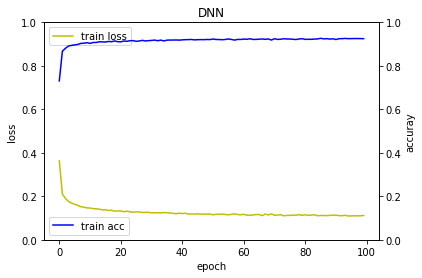

163/163 [==============================] - 0s 2ms/step - loss: 0.0829 - accuracy: 0.9405
loss_and_metrics : [0.08287062495946884, 0.9404739141464233]
0:02:27


In [ ]:
start = time.time()
# 라이브러리
from keras.models import Sequential
from keras.layers import Dense, Dropout,Conv2D, MaxPooling2D, Activation
from keras.utils import to_categorical



# 다중퍼셉트론2 모델 구성
model = Sequential()
model.add(Dense(16, input_dim=65, kernel_initializer='RandomUniform',activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(32, activation='tanh'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(32, activation='tanh'))   # relu
model.add(Dropout(0.25))
model.add(Dense(16, activation='relu'))
model.add(Dense(3, activation='sigmoid'))  # softmax

# 모델 학습과정 설정
model.compile(optimizer='Adam', loss="binary_crossentropy", metrics=['accuracy'])  # binary_crossentropy, categorical_crossentropy
print(model.summary())

##### 모델 학습(여기에 Train 파일 넣으세용) #####
epochs = 100
hist = model.fit(X3_train, one_hot_train_labels, epochs=epochs, batch_size=64)

    
# 5. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots() # Figure와 axes.Axes, 두 개의 오브젝트를 리턴

acc_ax = loss_ax.twinx() # x축을 하나 더 만든다

loss_ax.set_ylim([0.0, 1.0])
acc_ax.set_ylim([0.0, 1.0])

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.title("DNN")
plt.show()

# 6. 모델 평가하기
loss_and_metrics = model.evaluate(X3_test, one_hot_test_labels, batch_size=64)
print('loss_and_metrics : ' + str(loss_and_metrics))
print( clock(start) )

## 이 모델들은 그냥 ㅎㅎ :)


*   LSTM
*   RNN



LSTM 이당

In [ ]:
# 데이터 변환
# LTSM : 입력을 (샘플 수, 타입스텝, 특성 수)로 형태 변환
x_train = np.array(X3_train).reshape((X3_train.shape[0], X3_train.shape[1], 1))
y_train = np.array(rorl_train).reshape((rorl_train.shape[0], 1))
x_test = np.array(X3_test).reshape((X3_test.shape[0], X3_test.shape[1],1))
y_test = np.array(rorl_test).reshape((rorl_test.shape[0], 1))

In [ ]:
x_train.shape

(31146, 65, 1)

In [ ]:
y_train.shape

(31146, 1)

Epoch 1/10
61/61 [==============================] - 5s 82ms/step - loss: -0.4113 - accuracy: 0.3738
Epoch 2/10
61/61 [==============================] - 5s 83ms/step - loss: -0.7305 - accuracy: 0.3759
Epoch 3/10
61/61 [==============================] - 5s 84ms/step - loss: -0.8774 - accuracy: 0.3759
Epoch 4/10
61/61 [==============================] - 5s 84ms/step - loss: -1.0122 - accuracy: 0.3759
Epoch 5/10
61/61 [==============================] - 5s 84ms/step - loss: -1.1404 - accuracy: 0.3759
Epoch 6/10
61/61 [==============================] - 5s 84ms/step - loss: -1.2649 - accuracy: 0.3759
Epoch 7/10
61/61 [==============================] - 5s 83ms/step - loss: -1.3881 - accuracy: 0.3759
Epoch 8/10
61/61 [==============================] - 5s 82ms/step - loss: -1.5042 - accuracy: 0.3759
Epoch 9/10
61/61 [==============================] - 5s 82ms/step - loss: -1.6059 - accuracy: 0.3759
Epoch 10/10
61/61 [==============================] - 5s 81ms/step - loss: -1.6823 - accuracy: 0.3759

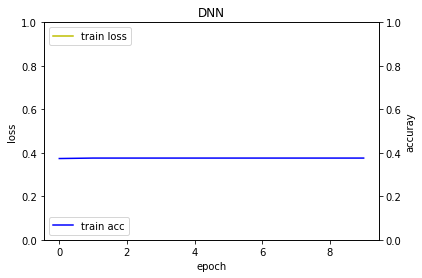

325/325 [==============================] - 4s 12ms/step - loss: -1.8046 - accuracy: 0.3724
loss_and_metrics : [-1.8046051263809204, 0.3723752796649933]
0:01:05


In [ ]:
start = time.time()
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Activation, Dropout, LSTM

# RNN 모델 구성
model = Sequential()
model.add(LSTM(32, input_shape = (65,1), return_sequences = True ,activation='tanh'))
model.add(Dropout(0.25))
model.add(LSTM(64, return_sequences = True, activation='tanh'))
model.add(Dropout(0.25))
model.add(LSTM(128, return_sequences = True, activation='tanh'))
model.add(Dropout(0.25))
model.add(LSTM(256, return_sequences = True ,activation='tanh'))
model.add(Dropout(0.25))
model.add(LSTM(128, return_sequences = True, activation='tanh'))
model.add(Dropout(0.25))
model.add(LSTM(64, return_sequences = True, activation='tanh'))
model.add(Dropout(0.25))
model.add(Dense(32, activation='tanh'))
model.add(Dropout(0.25))
model.add(Dense(16, activation='tanh'))
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid'))

# 모델 학습과정 설정
model.compile(optimizer='adam', loss="binary_crossentropy", metrics=['accuracy'])

##### 모델 학습(여기에 Train 파일 넣으세용) #####
hist = model.fit(x_train, y_train, epochs=10, batch_size=512 )

# 5. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots() # Figure와 axes.Axes, 두 개의 오브젝트를 리턴

acc_ax = loss_ax.twinx() # x축을 하나 더 만든다

loss_ax.set_ylim([0.0, 1.0])
acc_ax.set_ylim([0.0, 1.0])

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.title("DNN")
plt.show()

# 6. 모델 평가하기
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
print('loss_and_metrics : ' + str(loss_and_metrics))
print( clock(start) )

RNN 이당

In [ ]:
# 데이터 변환
# LTSM : 입력을 (샘플 수, 타입스텝, 특성 수)로 형태 변환
x_train = np.array(X3_train).reshape((X3_train.shape[0], X3_train.shape[1], 1))
y_train = np.array(rorl_train).reshape((rorl_train.shape[0], 1))
x_test = np.array(X3_test).reshape((X3_test.shape[0], X3_test.shape[1],1))
y_test = np.array(rorl_test).reshape((rorl_test.shape[0], 1))

Epoch 1/10
61/61 [==============================] - 12s 197ms/step - loss: -0.3861 - accuracy: 0.3694
Epoch 2/10
61/61 [==============================] - 12s 195ms/step - loss: -0.7649 - accuracy: 0.3759
Epoch 3/10
61/61 [==============================] - 12s 205ms/step - loss: -0.9105 - accuracy: 0.3759
Epoch 4/10
61/61 [==============================] - 12s 201ms/step - loss: -1.0423 - accuracy: 0.3759
Epoch 5/10
61/61 [==============================] - 12s 199ms/step - loss: -1.1706 - accuracy: 0.3759
Epoch 6/10
61/61 [==============================] - 12s 205ms/step - loss: -1.2954 - accuracy: 0.3759
Epoch 7/10
61/61 [==============================] - 13s 206ms/step - loss: -1.4162 - accuracy: 0.3759
Epoch 8/10
61/61 [==============================] - 13s 205ms/step - loss: -1.5300 - accuracy: 0.3759
Epoch 9/10
61/61 [==============================] - 12s 200ms/step - loss: -1.6257 - accuracy: 0.3759
Epoch 10/10
61/61 [==============================] - 12s 202ms/step - loss: -1.698

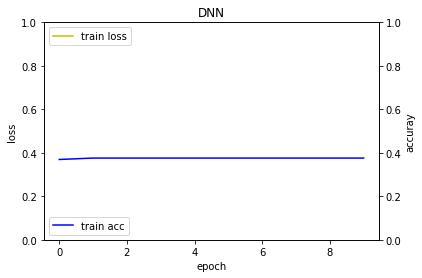

325/325 [==============================] - 9s 26ms/step - loss: -1.8279 - accuracy: 0.3724
loss_and_metrics : [-1.827858805656433, 0.3723752796649933]
0:02:17


In [ ]:
start = time.time()
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Activation, Dropout, LSTM

# RNN 모델 구성
model = Sequential()
model.add(SimpleRNN(32,input_shape = (65,1), return_sequences = True, activation='tanh'))
model.add(Dropout(0.25))
model.add(Dense(64, activation='tanh'))
model.add(Dropout(0.25))
model.add(SimpleRNN(128, return_sequences = True ,activation='tanh'))
model.add(Dropout(0.25))
model.add(SimpleRNN(256, return_sequences = True, activation='tanh'))
model.add(Dropout(0.25))
model.add(SimpleRNN(128, return_sequences = True, activation='tanh'))
model.add(Dropout(0.25))
model.add(SimpleRNN(64, return_sequences = True, activation='tanh'))
model.add(Dropout(0.25))
model.add(Dense(32, activation='tanh'))
model.add(Dropout(0.25))
model.add(Dense(16, activation='tanh'))
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid'))

# 모델 학습과정 설정
model.compile(optimizer='adam', loss="binary_crossentropy", metrics=['accuracy'])

##### 모델 학습(여기에 Train 파일 넣으세용) #####
hist = model.fit(x_train, y_train, epochs=10, batch_size=512 )

# 5. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots() # Figure와 axes.Axes, 두 개의 오브젝트를 리턴

acc_ax = loss_ax.twinx() # x축을 하나 더 만든다

loss_ax.set_ylim([0.0, 1.0])
acc_ax.set_ylim([0.0, 1.0])

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.title("DNN")
plt.show()

# 6. 모델 평가하기
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
print('loss_and_metrics : ' + str(loss_and_metrics))
print( clock(start) )

# 4단계로 나누어

In [ ]:
# 데이터 로드
# Refrigerant overcharge
start = time.time()
ro10 = pd.read_excel("/content/drive/My Drive/1043-RP/FDD Data/3_Refrigerant overcharge/ro10.xls",sheet_name="Complete Data Set")
ro20 = pd.read_excel("/content/drive/My Drive/1043-RP/FDD Data/3_Refrigerant overcharge/ro20.xls",sheet_name="Complete Data Set")
ro30 = pd.read_excel("/content/drive/My Drive/1043-RP/FDD Data/3_Refrigerant overcharge/ro30.xls",sheet_name="Complete Data Set")
ro40 = pd.read_excel("/content/drive/My Drive/1043-RP/FDD Data/3_Refrigerant overcharge/ro40.xls",sheet_name="Complete Data Set")
print("ro",  clock(start) )

# Refrigerant leak
start = time.time()
rl10 = pd.read_excel("/content/drive/My Drive/1043-RP/FDD Data/8_Refrigerant leak/rl10.xls",sheet_name="Complete Data Set")
rl20 = pd.read_excel("/content/drive/My Drive/1043-RP/FDD Data/8_Refrigerant leak/rl20.xls",sheet_name="Complete Data Set")
rl30 = pd.read_excel("/content/drive/My Drive/1043-RP/FDD Data/8_Refrigerant leak/rl30.xls",sheet_name="Complete Data Set")
rl40 = pd.read_excel("/content/drive/My Drive/1043-RP/FDD Data/8_Refrigerant leak/rl40.xls",sheet_name="Complete Data Set")
print("rl",  clock(start) )

# 심각도 수준 적기
ro10['severity'] = 1
ro20['severity'] = 2
ro30['severity'] = 3
ro40['severity'] = 4

rl10['severity'] = 1
rl20['severity'] = 2
rl30['severity'] = 3
rl40['severity'] = 4

#
ro = pd.concat([ro20,ro30,ro40], axis=0)
rl= pd.concat([rl20,rl30,rl40], axis=0)

# 1은 ro, 2는 rl
ro['rorl'] = 2  
rl['rorl'] = 3  

# 0은 심각도 1단계들만 묶어서
ro10['rorl'] = 0  
rl10['rorl'] = 1 

#
ro = pd.concat([ro10,ro], axis=0)
rl= pd.concat([rl10,rl], axis=0)

ro 0:00:03
rl 0:00:03


In [ ]:
data1 = pd.concat([ro, rl], axis=0)
data1 = data1.drop(['Time'],axis=1)
data1

,TWE_set,TEI,TWEI,TEO,TWEO,TCI,TWCI,TCO,TWCO,TSI,TSO,TBI,TBO,Cond Tons,Cooling Tons,Shared Cond Tons,Cond Energy Balance,Evap Tons,Shared Evap Tons,Building Tons,Evap Energy Balance,kW,COP,kW/Ton,FWC,FWE,TEA,TCA,TRE,PRE,TRC,PRC,TRC_sub,T_suc,Tsh_suc,TR_dis,Tsh_dis,P_lift,Amps,RLA%,Heat Balance (kW),Heat Balance%,Tolerance%,Unit Status,Active Fault,TO_sump,TO_feed,PO_feed,PO_net,TWCD,TWED,VSS,VSL,VH,VM,VC,VE,VW,TWI,TWO,THI,THO,FWW,FWH,FWB,severity,rorl
0,50,70.67,70.6,71.76,71.7,71.73,71.5,72.59,72.5,72.24,73.22,70.89,71.37,1.383000e-46,5.720000e-47,1.590000e-46,2.400000e-46,1.407000e-46,-1.122000e-46,6.212000e-47,9.067000e-47,1.682000e-45,4.949000e-46,1.682000e-45,3.868000e-45,3.097000e-45,0.1,0.0,71.6,73.5,71.2,73.0,0.1,84.7,13.1,75.2,4.0,0.0,0,0,0.000,0.00,23.27,1,29,114.7,90.7,69.0,0.0,1.0,0.0,0.0,0.0,100,100.0,57.0,56,0.0,66.70,71.87,70.65,71.54,2.655000e-46,1.491000e-45,1.175000e-45,1,0
1,50,70.67,70.8,71.76,71.7,71.73,71.7,72.55,72.3,72.28,73.27,70.89,71.37,1.317000e-46,4.399000e-47,1.590000e-46,2.466000e-46,1.407000e-46,-1.122000e-46,6.212000e-47,9.067000e-47,1.682000e-45,4.949000e-46,1.682000e-45,3.868000e-45,3.097000e-45,0.1,0.0,71.6,73.5,71.2,73.0,0.1,84.7,13.1,75.2,3.8,0.0,0,0,0.000,0.00,23.27,1,29,114.5,90.8,69.0,0.0,0.6,0.0,0.0,0.0,100,100.0,57.0,56,30.0,66.70,71.87,70.65,71.58,2.042000e-46,1.491000e-45,1.175000e-45,1,0
2,50,70.67,70.9,71.76,71.8,71.73,72.0,72.59,72.0,72.28,73.27,70.89,71.37,8.520000e+00,3.118000e+00,9.796000e+00,1.520000e+01,6.133000e+00,-4.889000e+00,2.707000e+00,3.951000e+00,1.682000e-45,2.156000e+01,2.742000e-46,2.383000e+02,1.350000e+02,0.8,0.0,71.1,72.5,71.9,74.0,0.2,84.7,13.6,75.4,3.5,1.2,0,0,-8.392,-28.01,23.27,6,0,114.5,90.8,68.0,0.0,0.0,0.0,0.0,0.0,100,100.0,57.0,56,30.0,66.70,71.87,70.69,71.54,1.447000e+01,6.496000e+01,1.210000e+02,1,0
3,50,70.75,71.5,71.76,71.4,71.82,71.7,72.51,72.0,72.24,73.06,70.97,71.37,7.644000e+00,3.006000e+00,9.060000e+00,1.370000e+01,8.448000e+00,-6.594000e+00,3.345000e+00,5.198000e+00,1.682000e-45,2.970000e+01,1.991000e-46,2.643000e+02,2.010000e+02,0.0,0.0,71.4,73.3,71.6,73.5,0.0,84.8,13.4,75.4,3.6,0.4,0,0,2.824,10.51,23.27,6,0,113.8,90.8,68.0,0.0,0.2,0.1,0.0,0.0,100,100.0,57.0,56,30.0,66.70,71.83,71.59,71.41,1.406000e+01,8.028000e+01,1.060000e+02,1,0
4,50,70.88,71.5,71.68,71.5,71.86,71.8,72.43,71.8,72.20,72.73,71.02,71.41,6.385000e+00,2.593000e+00,5.991000e+00,9.783000e+00,7.115000e+00,-5.881000e+00,3.534000e+00,4.768000e+00,1.682000e-45,2.502000e+01,2.363000e-46,2.682000e+02,2.123000e+02,0.3,0.0,71.1,72.8,71.6,73.5,0.1,84.9,13.8,75.2,3.8,0.5,0,0,2.566,11.43,23.27,6,0,113.8,90.8,68.0,0.0,0.0,0.1,0.0,0.0,100,100.0,57.0,56,30.0,66.46,71.75,71.47,71.37,1.176000e+01,8.481000e+01,1.271000e+02,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5186,40,56.83,57.1,56.82,56.9,57.08,57.1,57.40,56.9,57.25,57.01,56.85,57.00,5.248000e-47,2.419000e-47,3.898000e-47,-1.070000e-47,1.890000e-48,4.042000e-48,1.984000e-47,2.199000e-47,1.682000e-45,6.646000e-48,1.682000e-45,3.868000e-45,3.097000e-45,0.1,0.4,56.8,53.5,57.3,54.1,0.0,74.7,17.8,97.3,39.8,0.1,0,0,0.000,0.00,23.27,6,0,106.3,106.5,49.7,0.0,0.0,0.3,0.0,0.0,100,100.0,56.0,56,0.0,55.98,56.60,57.18,57.20,5.806000e-46,4.762000e-46,3.771000e-45,4,3
5187,40,56.83,56.9,56.82,56.8,57.08,57.1,57.36,57.1,57.29,57.01,56.89,56.96,4.588000e-47,1.100000e-47,4.557000e-47,-1.070000e-47,1.890000e-48,9.327000e-48,9.272000e-48,1.671000e-47,1.682000e-45,6.646000e-48,1.682000e-45,3.868000e-45,3.097000e-45,0.1,0.2,56.8,53.5,57.3,54.1,0.0,74.6,17.8,97.3,40.1,0.1,0,0,0.000,0.00,23.27,6,0,106.3,106.7,49.2,0.0,0.2,0.0,0.0,0.0,100,100.0,56.0,56,0.0,55.98,56.60,57.18,57.25,2.641000e-46,2.225000e-46,3.644000e-45,4,3
5188,40,56.83,57.1,56.82,56.9,57.08,57.2,57.40,57.1,57.25,57.01,56.89,57.00,5.248000e-47,2.419000e-47,3.898000e-47,

In [ ]:
# 표준화
scaler = StandardScaler()
scaler.fit(data1.iloc[:,:-2])
X_scaled = scaler.transform(data1.iloc[:,:-2])
X_scaled = pd.DataFrame(X_scaled).reset_index(drop=True)

y_rorl_sev = pd.DataFrame(data1.iloc[:,-2:]).reset_index(drop=True)

X = pd.concat([X_scaled, y_rorl_sev], axis=1)

In [ ]:
X2 = X.iloc[:,:-1]
y_rorl = X.iloc[:,-2:]
y_sev = X.iloc[:,-2]


# train, test 분리
#rorl
X3_train, X3_test, rorl_train, rorl_test = ms.train_test_split(X2, y_rorl, 
                                                      test_size = 0.25, random_state = 100, stratify = y_sev )

In [ ]:
# train 셋 (2,3,4만)
X3_train = X3_train.iloc[:,:-1]
rorl_train = rorl_train.iloc[:,-1]

X3_test = X3_test.iloc[:,:-1]
rorl_test = rorl_test.iloc[:,-1]

모델이양

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics   

#분류->object 회귀
start = time.time()

# 부스팅 타입은 default값인 gbdt로, 학습률은 0.01로 지정 하였음
LGB = lgb.LGBMClassifier(objective="regression", boosting_type='gbdt', learning_rate = 0.01)

param_list = {"n_estimators": list(range(10, 300, 10)),
              "max_depth": list(range(4, 21, 4)),
              "max_features": list(range(3, 13, 2)),
              "min_samples_split": list(range(3, 13, 2))}

# 하이퍼파라미터 최적화
LGB_random_search = RandomizedSearchCV(estimator = LGB,
                                        param_distributions = param_list,
                                        n_iter = 10,      # 10번반복하는 lightgbm 구현 : 성능개선 시도
                                        cv = 3,           # cross-validation 3번 반복
                                        n_jobs = 10,
                                        random_state=42)

LGB_random_search.fit(X3_train, rorl_train)
y_pred = LGB_random_search.predict(X3_test)

#성능평가
print('정확도 :', metrics.accuracy_score(rorl_test, y_pred))
print(confusion_matrix(rorl_test, y_pred))
print(classification_report(rorl_test, y_pred))

print( LGB_random_search.best_params_ )
print( clock(start) )

정확도 : 0.9822770179156232
[[1234    0   49   26]
 [   3 1266    6   12]
 [  20    1 3801   44]
 [  16    0    7 3897]]
              precision    recall  f1-score   support

           1       0.97      0.94      0.96      1309
           2       1.00      0.98      0.99      1287
           3       0.98      0.98      0.98      3866
           4       0.98      0.99      0.99      3920

    accuracy                           0.98     10382
   macro avg       0.98      0.98      0.98     10382
weighted avg       0.98      0.98      0.98     10382

{'n_estimators': 280, 'min_samples_split': 3, 'max_features': 11, 'max_depth': 20}
0:05:28


DNN 이당

In [ ]:
rorl_train.value_counts()

2    11707
3    11653
1     3904
0     3882
Name: rorl, dtype: int64

In [ ]:
rorl_train.shape

(31146,)

In [ ]:
# 원핫 인코딩 (One_Hot)
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(rorl_train)
one_hot_test_labels = to_categorical(rorl_test)

In [ ]:
one_hot_train_labels

array([[0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.]], dtype=float32)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                1056      
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                2112      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2

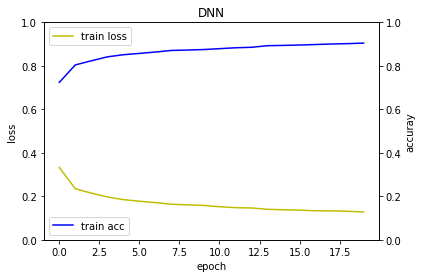

163/163 [==============================] - 0s 2ms/step - loss: 0.1133 - accuracy: 0.9202
loss_and_metrics : [0.11330248415470123, 0.9201502799987793]
0:00:36


In [ ]:
start = time.time()
# 라이브러리
from keras.models import Sequential
from keras.layers import Dense, Dropout,Conv2D, MaxPooling2D, Activation
from keras.utils import to_categorical



# 다중퍼셉트론2 모델 구성
model = Sequential()
model.add(Dense(16, input_dim=65, kernel_initializer='RandomUniform',activation='tanh'))
model.add(Dropout(0.25))
model.add(Dense(32, activation='tanh'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='tanh'))
model.add(Dropout(0.25))
model.add(Dense(32, activation='tanh'))   # relu
model.add(Dropout(0.25))
model.add(Dense(16, activation='tanh'))
model.add(Dense(4, activation='sigmoid'))  # softmax

# 모델 학습과정 설정
model.compile(optimizer='Adam', loss="binary_crossentropy", metrics=['accuracy'])  # binary_crossentropy, categorical_crossentropy
print(model.summary())

##### 모델 학습(여기에 Train 파일 넣으세용) #####
epochs = 20
hist = model.fit(X3_train, one_hot_train_labels, epochs=epochs, batch_size=64)

    
# 5. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots() # Figure와 axes.Axes, 두 개의 오브젝트를 리턴

acc_ax = loss_ax.twinx() # x축을 하나 더 만든다

loss_ax.set_ylim([0.0, 1.0])
acc_ax.set_ylim([0.0, 1.0])

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.title("DNN")
plt.show()

# 6. 모델 평가하기
loss_and_metrics = model.evaluate(X3_test, one_hot_test_labels, batch_size=64)
print('loss_and_metrics : ' + str(loss_and_metrics))
print( clock(start) )